# Plotting

> **Project:** NWC Summer Institute - 2023\
  **Theme:** 1\
  **Team:** BUCKETEARS\
  **Date:** July, 2023\
  **Author:** Soelem Aafnan Bhuiyan, George Mason University, Email: sbhuiya2@gmu.edu

### This ipython notebook is used for plotting the Kling-Gupta Efficiency (KGE) and Nash-Sutcliffe Efficiency (NSE) values from CFE Classic and CFE ODE calibrated runs. The notebook uses one major csv file, consisting of eight columns - *'gauge_id', 'gauge_lat', 'gauge_lon', 'aridity', 'kge_classic', 'kge_ode', 'nse_classic' and 'nse_ode'*. The first four column values are collected from the [CAMELS dataset](https://doi.org/10.5194/hess-21-5293-2017). Before running the scripts, make sure to have the **main.csv** file in the same directory as this notebook, with the csv file containing the data from 500 basins [gauch et al., 2021](https://doi.org/10.5194/hess-25-2045-2021) under eight above mentioned columns.

##

## Install seaborn package

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.6 MB/s eta 0:00:00a 0:00:01


## Import required packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.legend_handler import HandlerPathCollection
from datetime import datetime
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 600

## Read the csv file, drop the rows with *nan* values

In [3]:
df = pd.read_csv('main.csv')
df = df.dropna()

## Read the columns inside the csv file, assign them to pandas dataframes

In [4]:
lat = df['gauge_lat']
lon = df['gauge_lon']
kge_classic = df['kge_classic'] # KGE values from CFE Classic run
kge_ode = df['kge_ode'] # KGE values from CFE ODE run
nse_classic = df['nse_classic'] # NSE values from CFE Classic run
nse_ode = df['nse_ode'] # NSE values from CFE ODE run
aridity = df['aridity']

## Relationship between CFE Classic and CFE ODE based on KGE

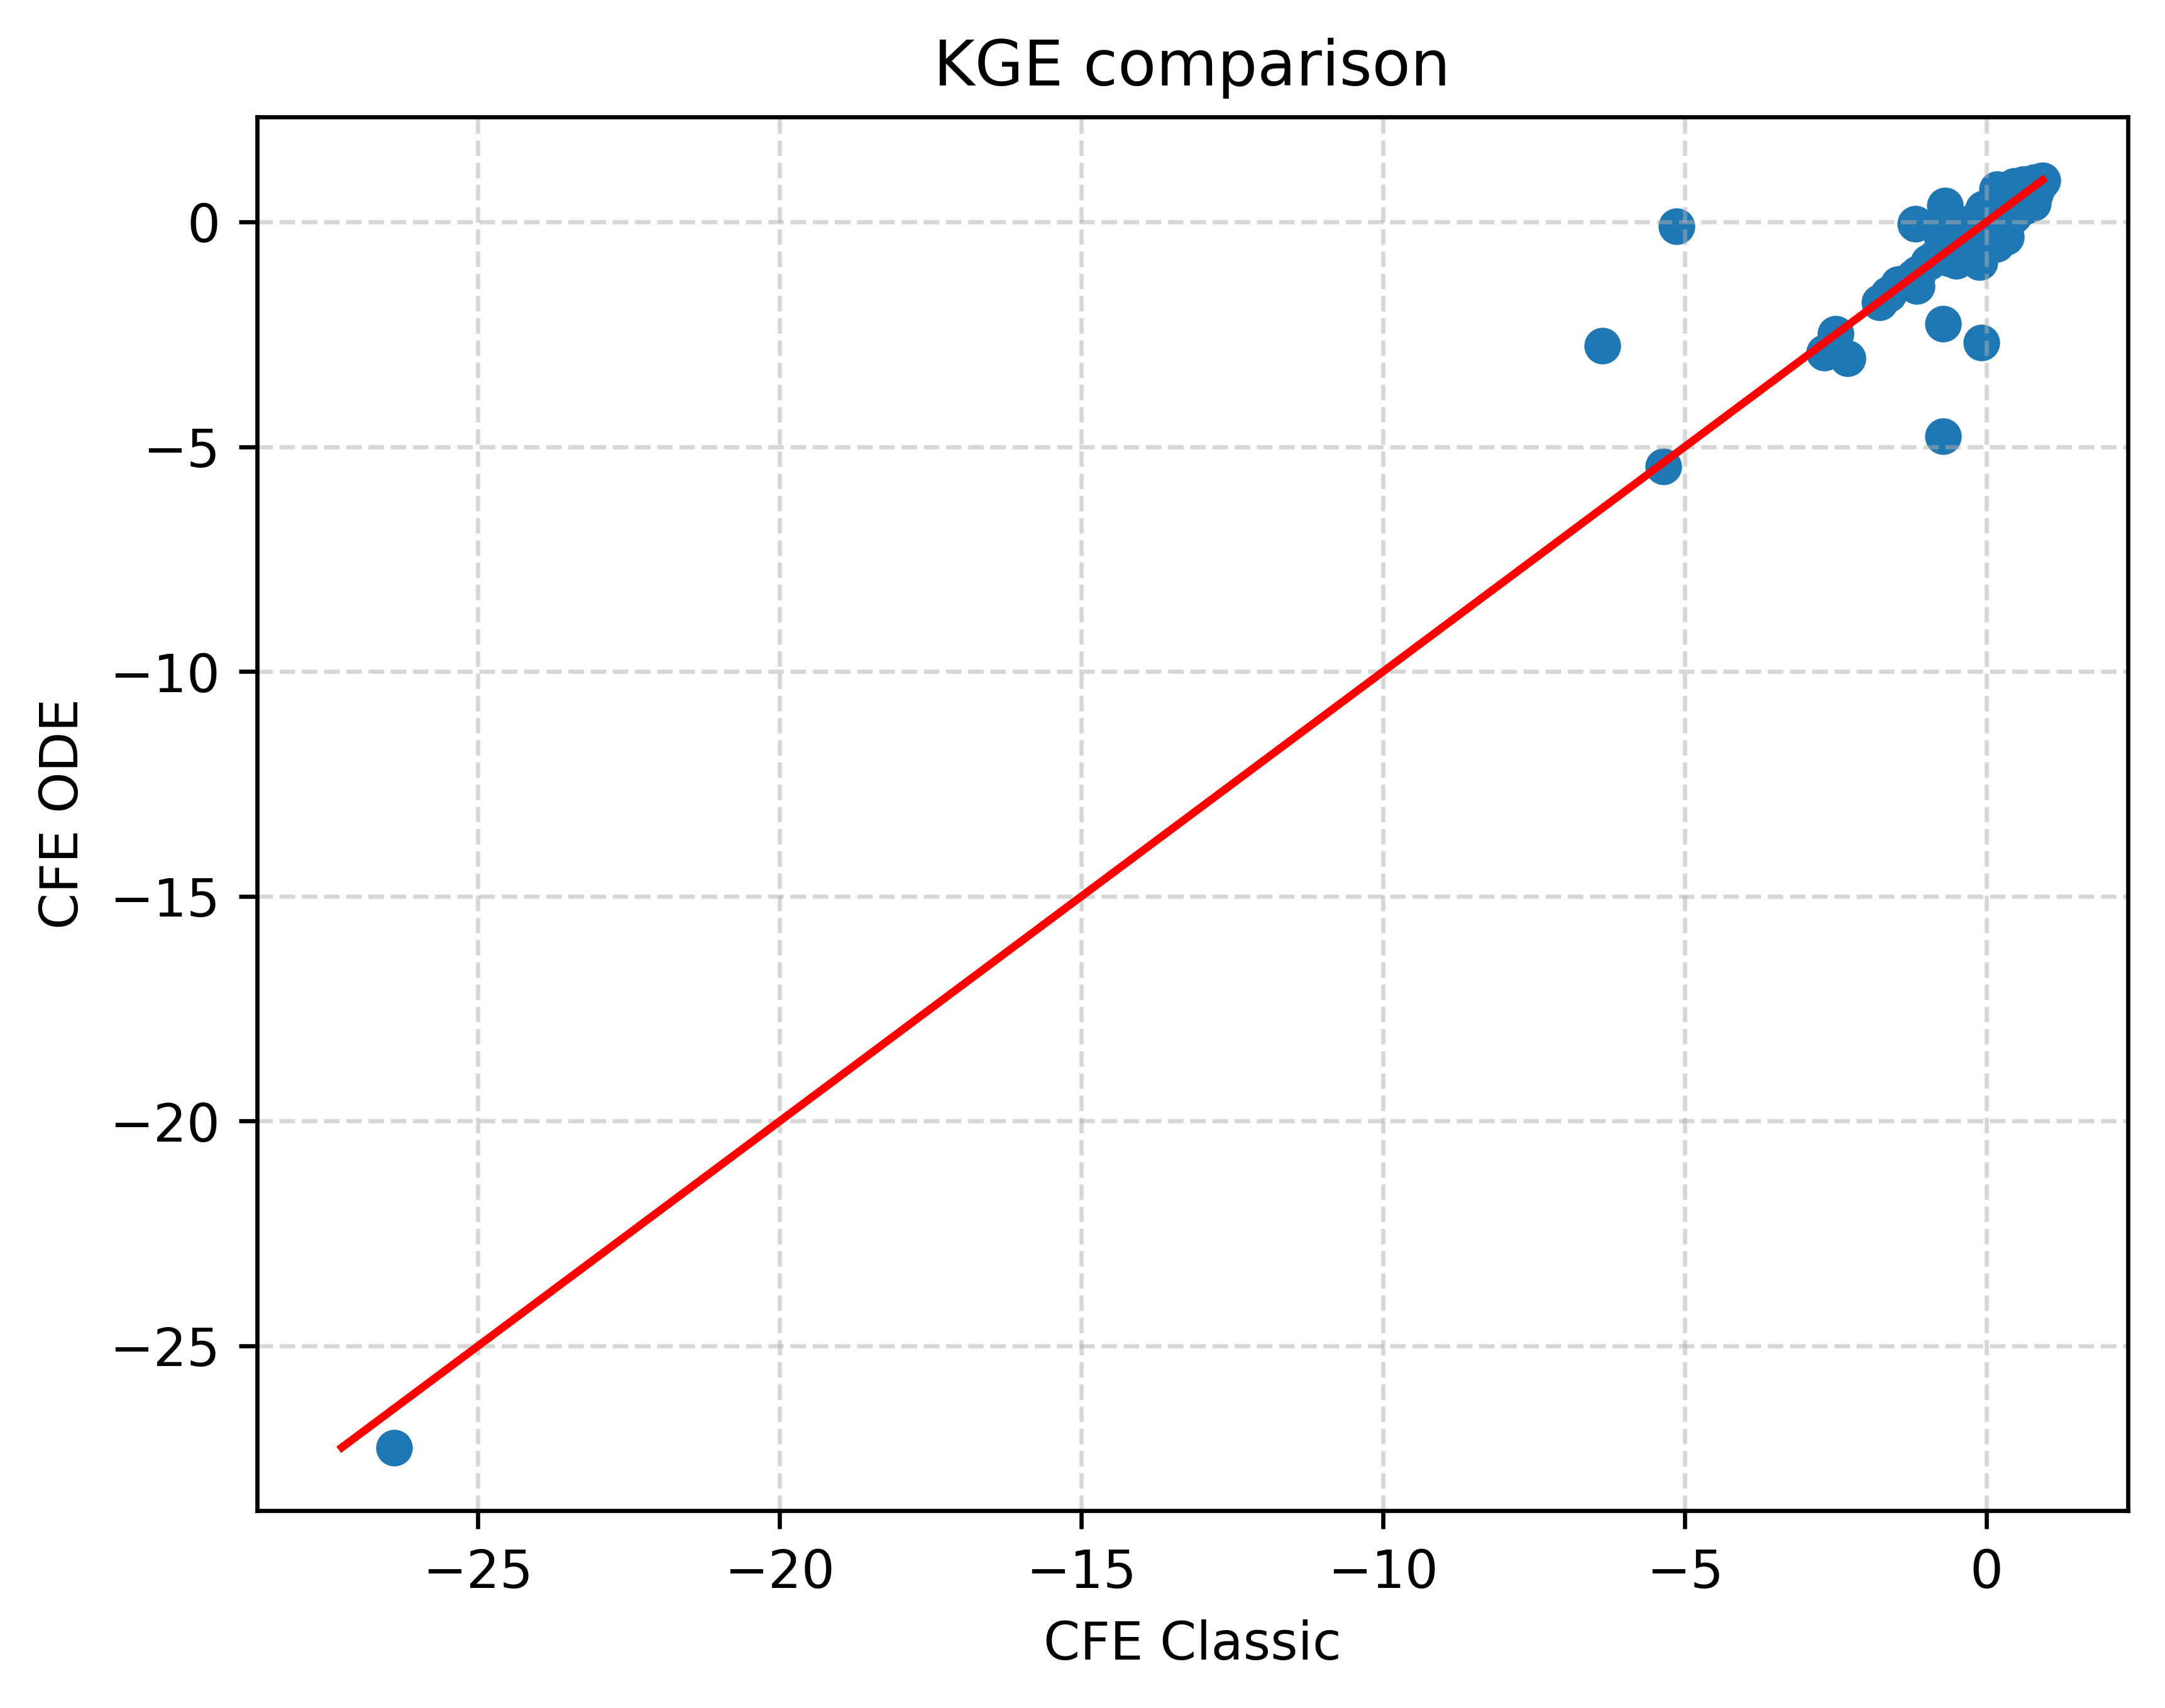

In [5]:
plt.scatter(kge_classic, kge_ode)
plt.xlabel('CFE Classic')
plt.ylabel('CFE ODE')
min_val = min(min(kge_classic), min(kge_ode)) # minimum value required for the red line
max_val = max(max(kge_classic), max(kge_ode)) # maximum value required for the red line
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.title('KGE comparison')
plt.grid(True, linestyle='--', alpha=0.5)

## Sorting values for CDF Plot

In [6]:
sorted_kge_classic = np.sort(kge_classic)
sorted_kge_ode = np.sort(kge_ode)
cum_prob_kge_classic = np.arange(len(sorted_kge_classic)) / float(len(sorted_kge_classic))
cum_prob_kge_ode = np.arange(len(sorted_kge_ode)) / float(len(sorted_kge_ode))

## Calculating mean and median values for CDF

In [7]:
kge_median_classic = np.median(kge_classic)
kge_median_ode = np.median(kge_ode)
print(f'CFE Classic Median KGE: {kge_median_classic}')
print(f'CFE ODE Median KGE: {kge_median_ode}')

CFE Classic Median KGE: 0.47610431
CFE ODE Median KGE: 0.47101533500000003


## CDF Plot - KGE

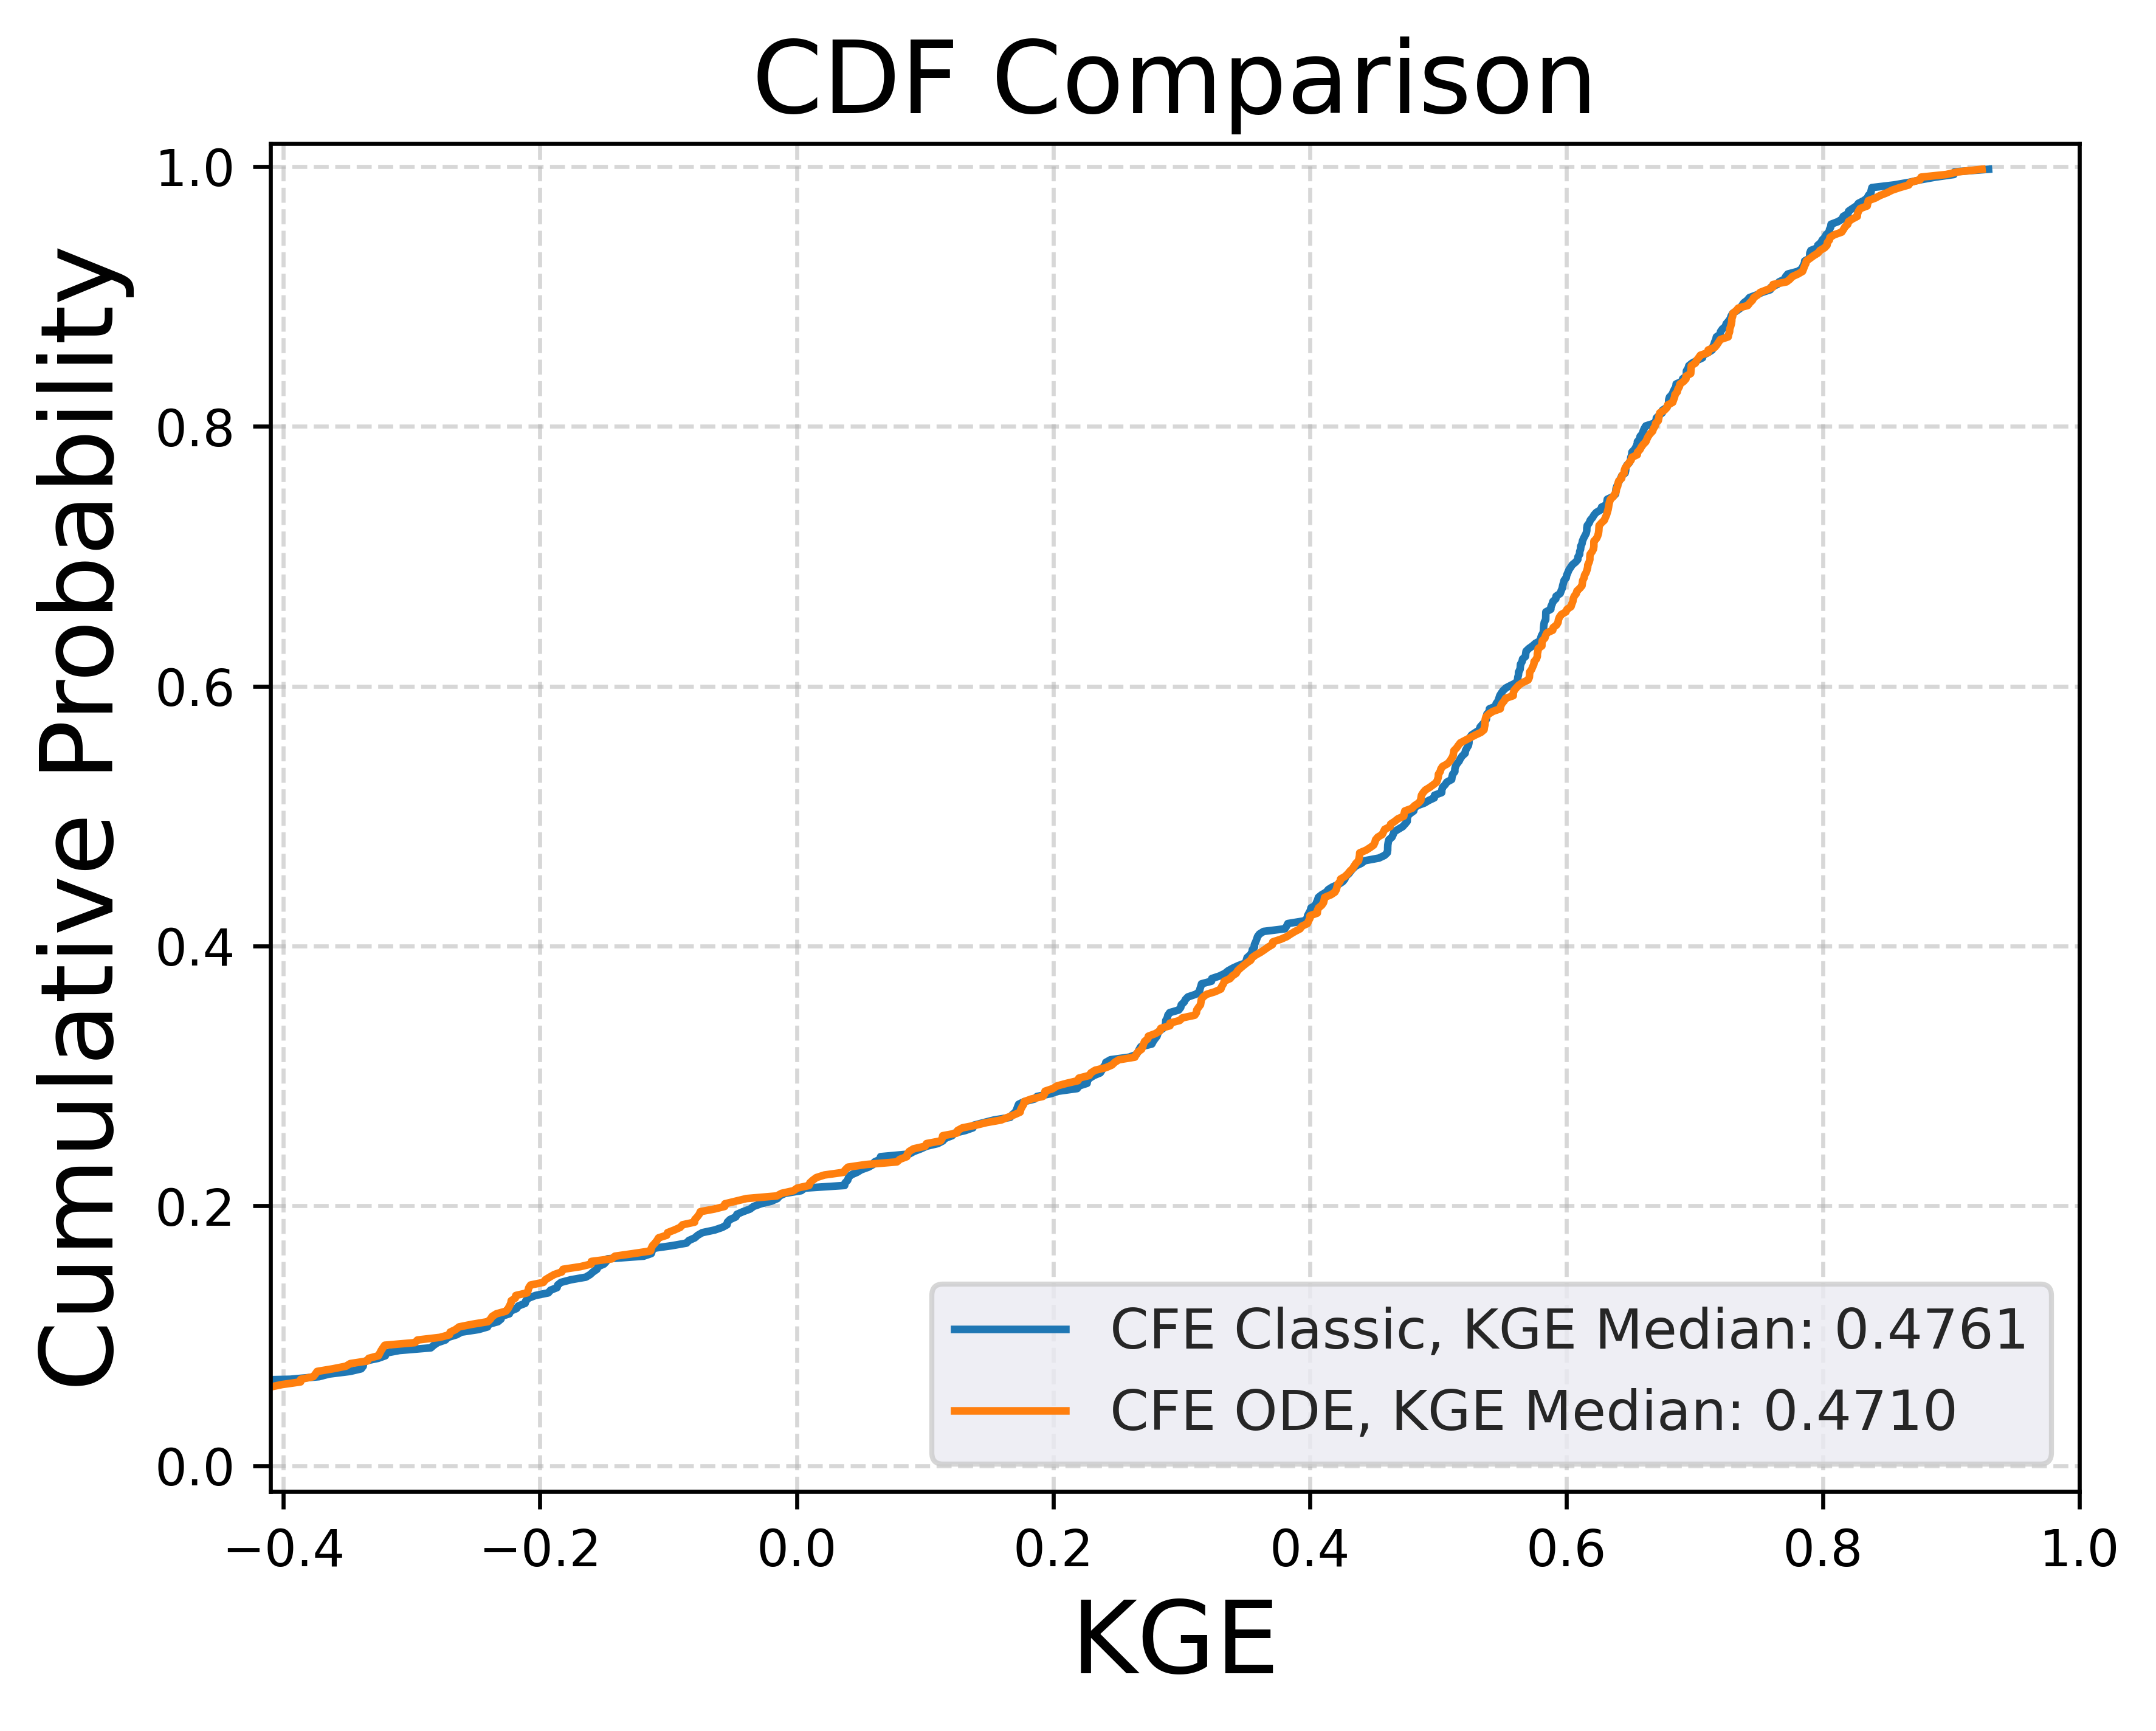

<Figure size 3840x2880 with 0 Axes>

In [8]:
plt.plot(sorted_kge_classic, cum_prob_kge_classic, label=f'CFE Classic, KGE Median: {kge_median_classic:.4f}')
plt.plot(sorted_kge_ode, cum_prob_kge_ode, label=f'CFE ODE, KGE Median: {kge_median_ode:.4f}')
sns.set_theme(style='darkgrid')
plt.xlabel('KGE', size=20)
plt.ylabel('Cumulative Probability', size=20)
plt.title('CDF Comparison', size=20)
plt.xlim(-0.41,1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.margins(0.02)
plt.show()
plt.savefig('CDF KGE')

## KGE-Aridity Plot

<Figure size 3840x2880 with 0 Axes>

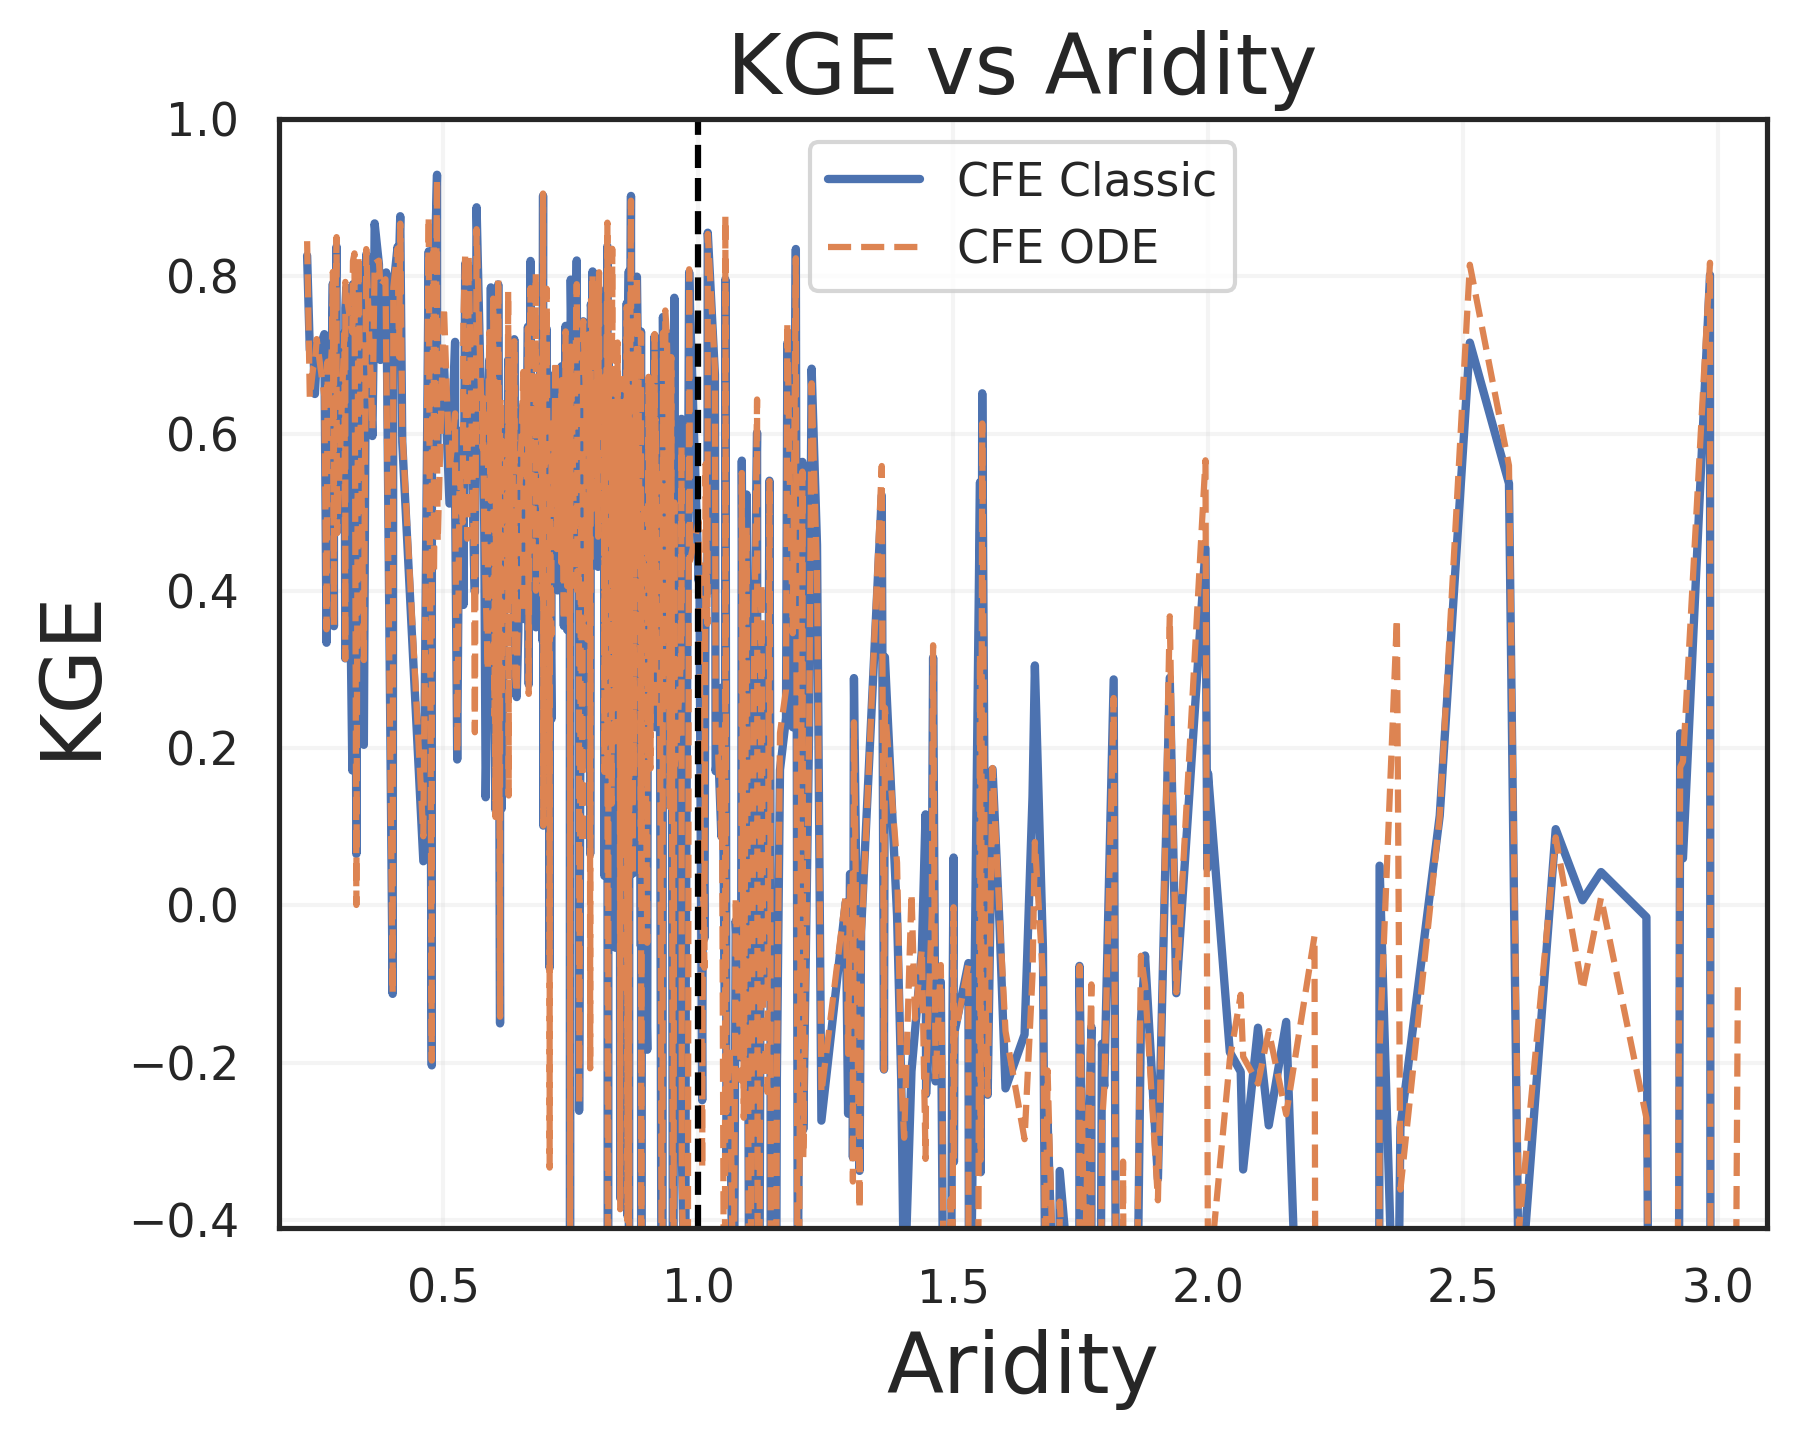

In [9]:
sns.set_style('white')
fig = plt.figure(dpi=600)
df_sorted_by_aridity = df.sort_values ('aridity')
sorted_aridity = df_sorted_by_aridity['aridity']
kge_classic_sorted_by_aridity = df_sorted_by_aridity['kge_classic']
kge_ode_sorted_by_aridity = df_sorted_by_aridity['kge_ode']
fig = plt.figure(dpi=300)
plt.plot(sorted_aridity, kge_classic_sorted_by_aridity, linewidth=2)
plt.plot(sorted_aridity, kge_ode_sorted_by_aridity, linestyle='--', linewidth=1.5)
plt.axvline(x=1, color='black', linestyle='--')
plt.legend(['CFE Classic','CFE ODE'])
plt.xlabel('Aridity', size=20)
plt.ylabel('KGE', size=20)
plt.ylim(-0.41,1)
plt.title('KGE vs Aridity', size=20)
plt.grid(True, linestyle='-', alpha=0.2)
plt.margins(0.02)
plt.savefig('Aridity KGE')

## Violin Plot - KGE

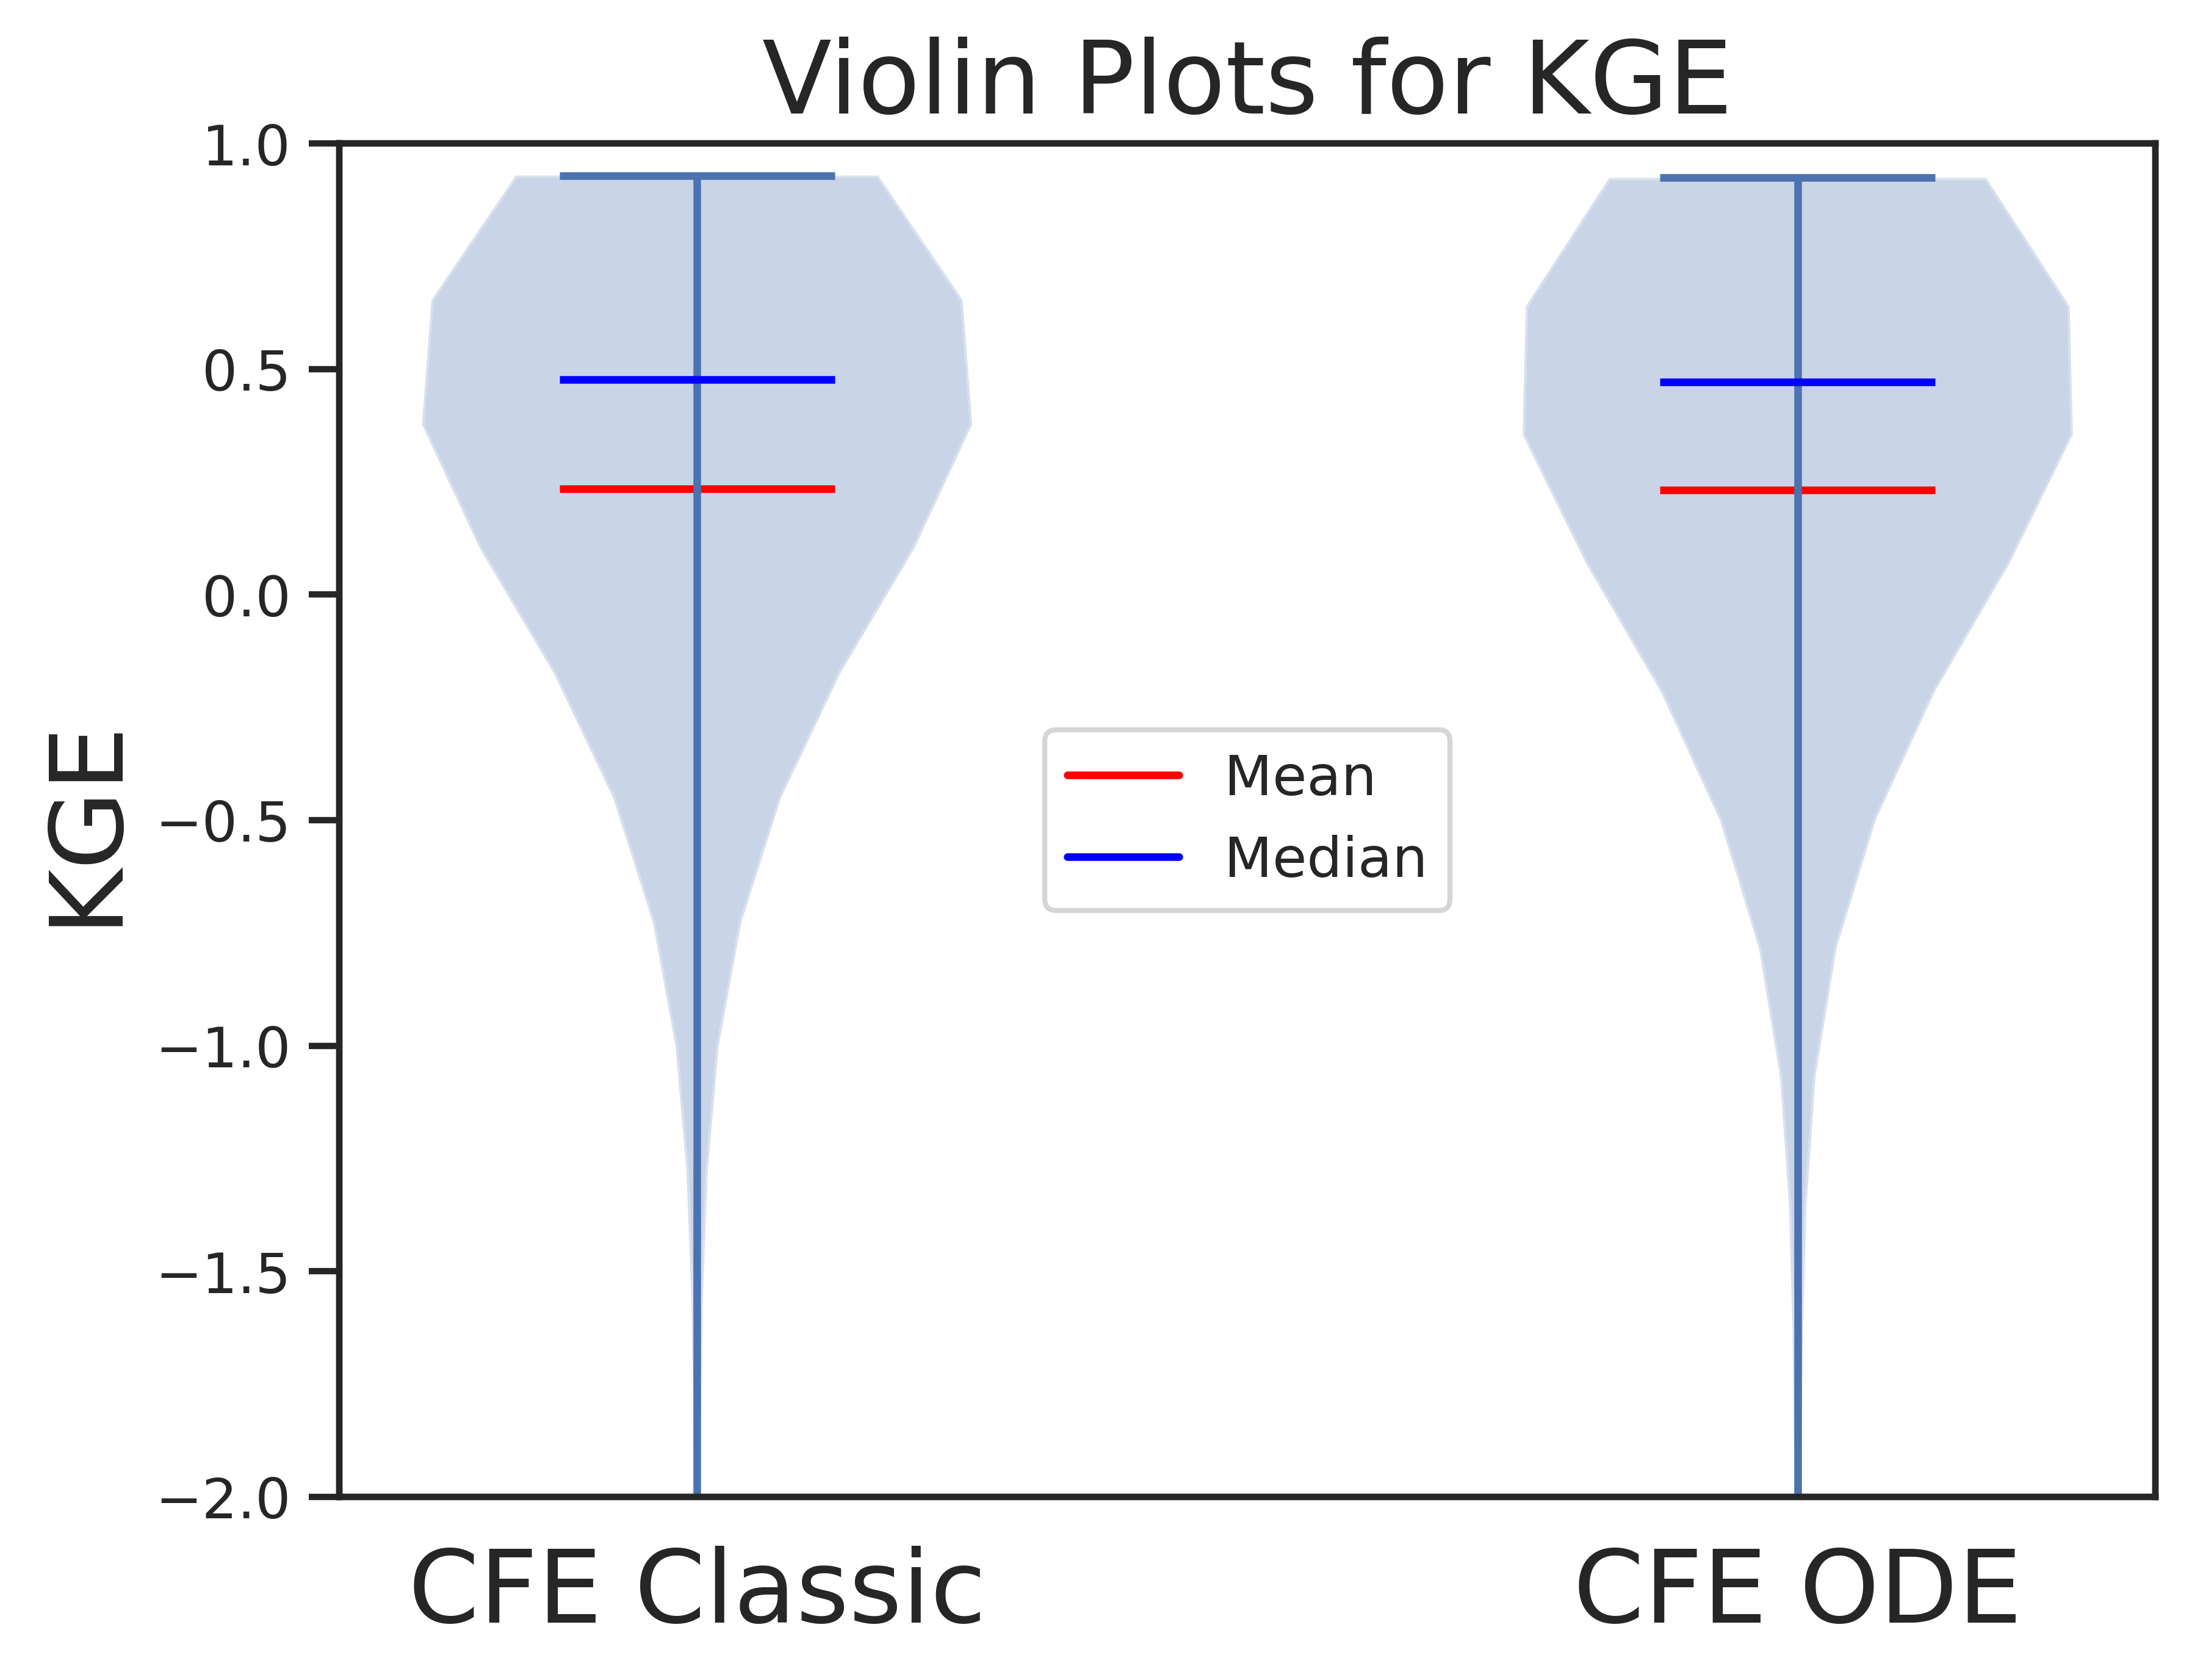

<Figure size 3840x2880 with 0 Axes>

In [24]:
violinplotdata = [kge_classic, kge_ode]
fig, ax = plt.subplots()
parts = ax.violinplot(violinplotdata, showmeans=True, showmedians=True)
parts['cmeans'].set_color('red')
parts['cmedians'].set_color('blue')
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
ax.set_ylim(-2, 1)
ax.set_ylabel('KGE', size=20)
ax2 = ax.twinx()
ax2.yaxis.set_visible(False)
ax.set_title('Violin Plots for KGE', size=20)
mean_legend = mlines.Line2D([], [], color='red', marker='None', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', marker='None', linestyle='-', markersize=5, label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='center')
plt.subplots_adjust(wspace=0.1)
plt.grid(True, linestyle='-', alpha=0.2)
plt.show()
plt.savefig('Violin KGE')

## Box Plot - KGE

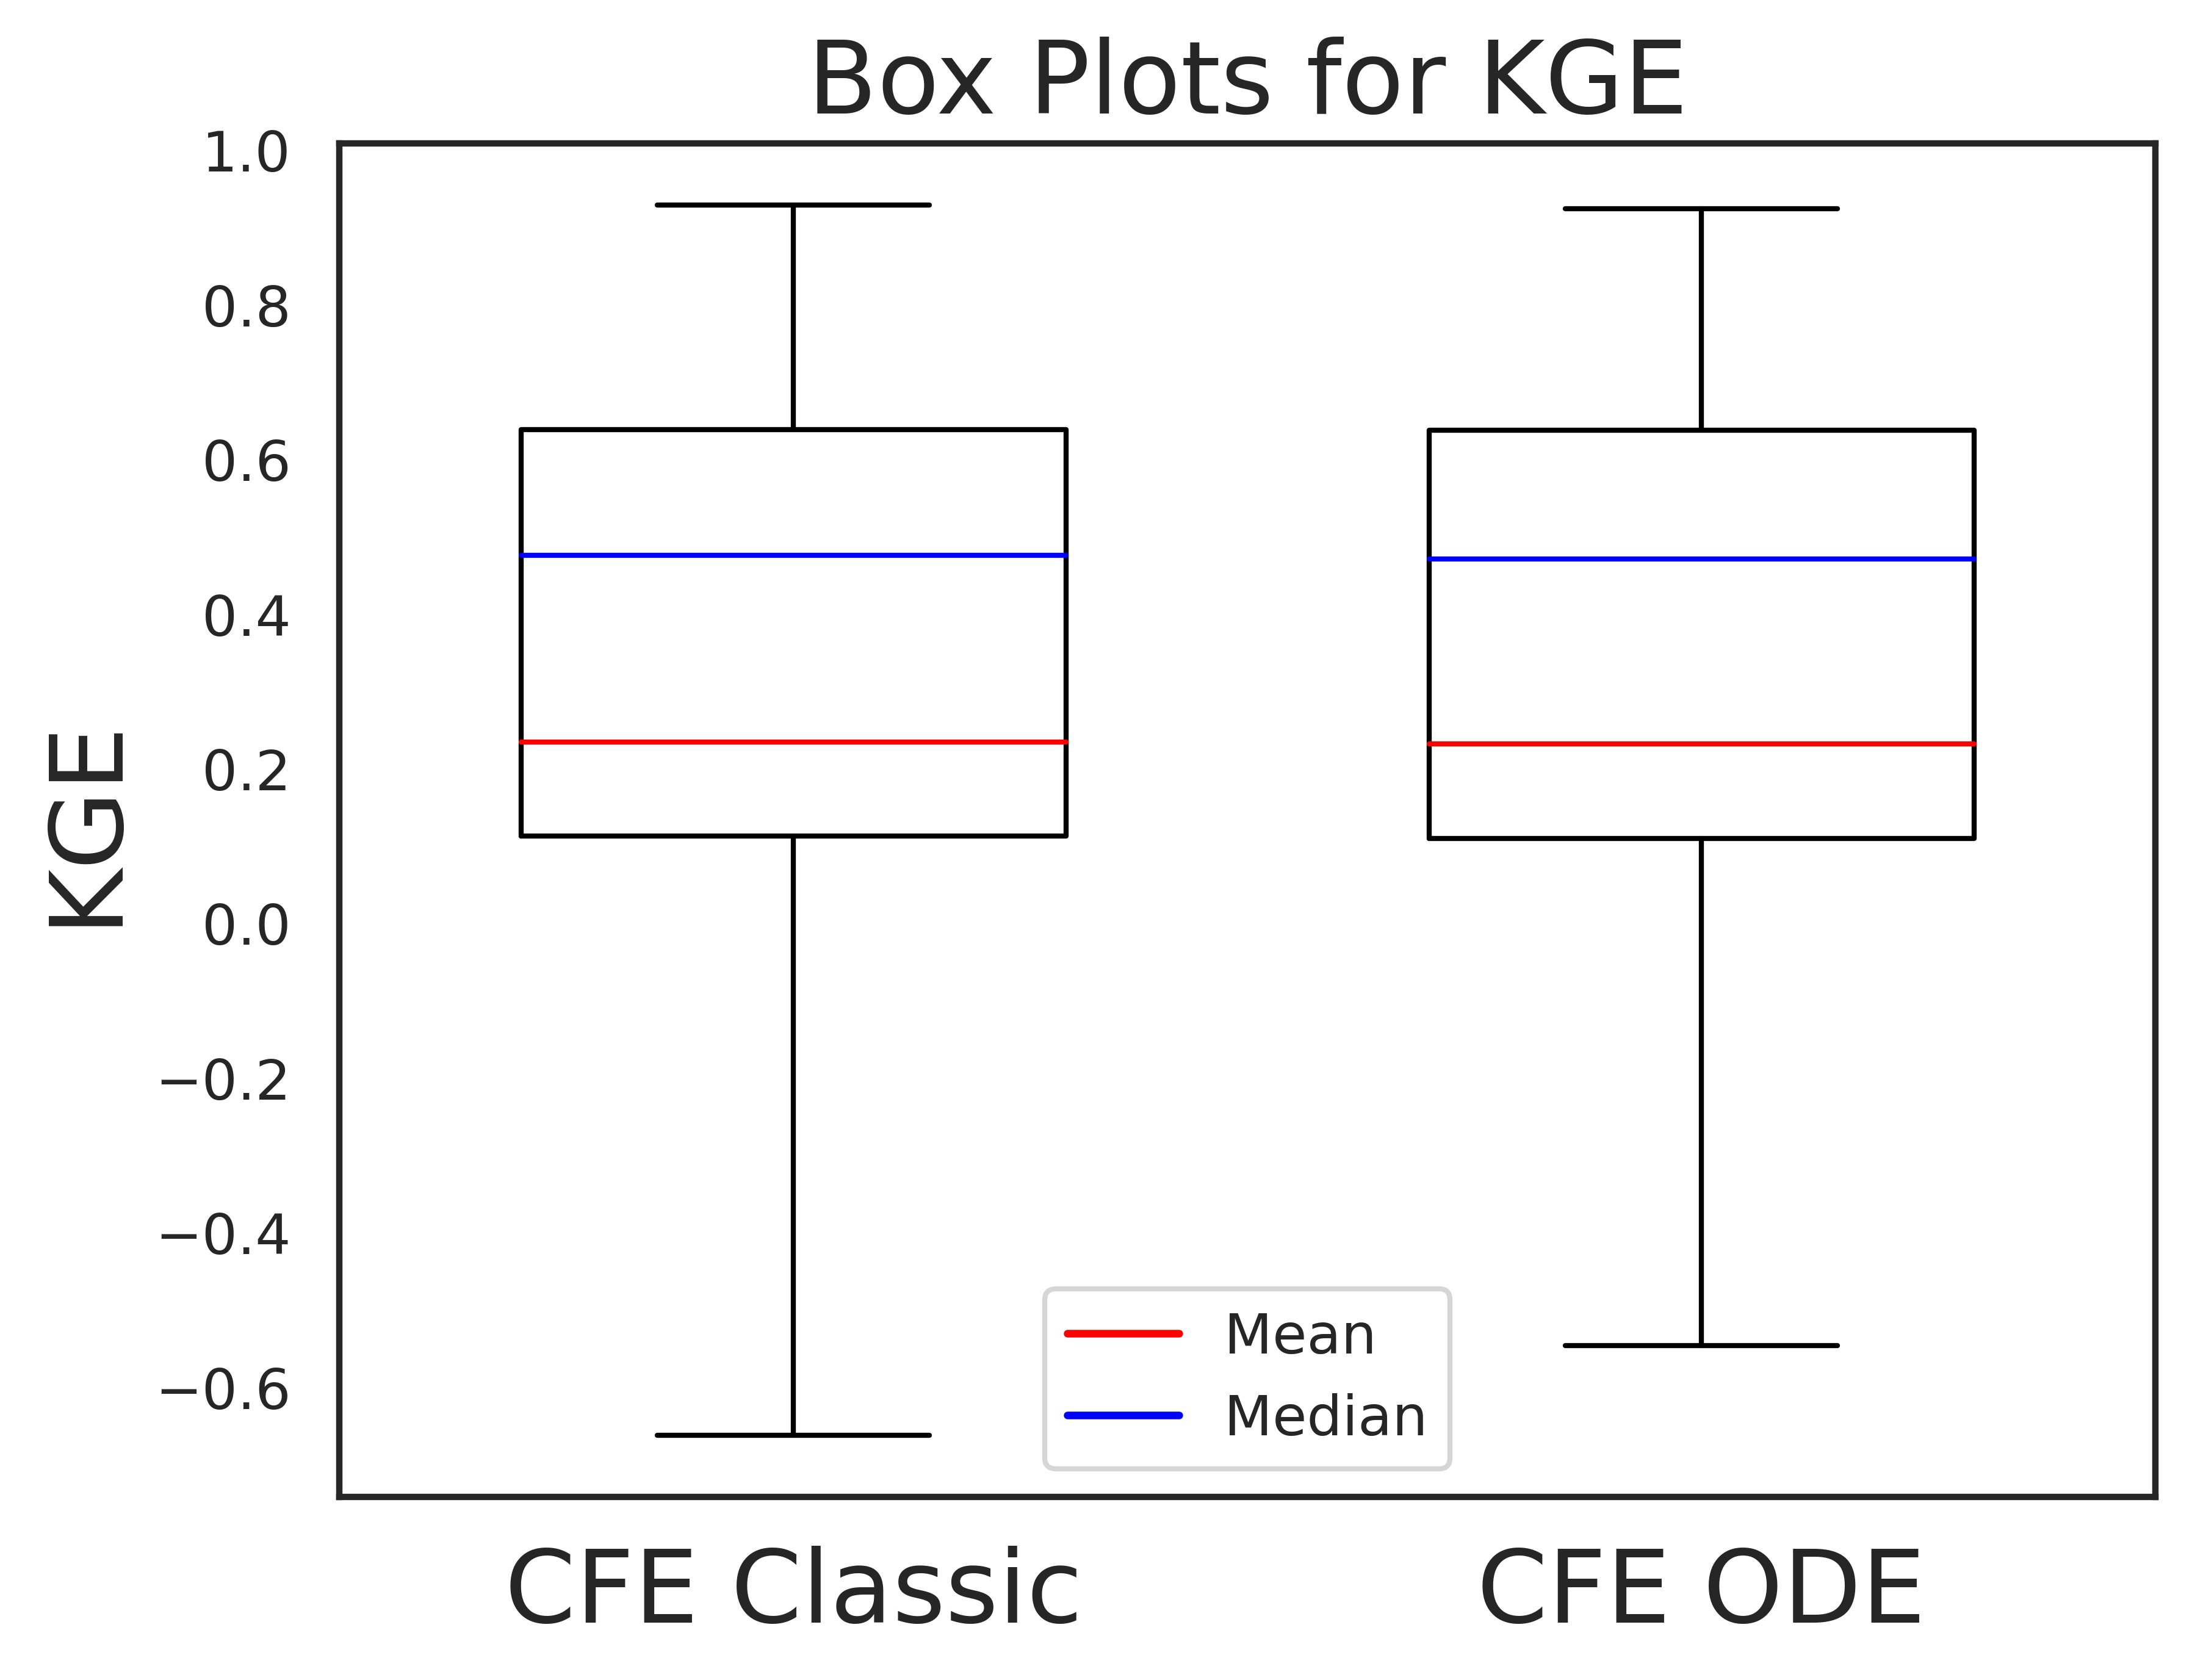

<Figure size 3840x2880 with 0 Axes>

In [11]:
fig, ax = plt.subplots()
bp1 = ax.boxplot(kge_classic, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
bp2 = ax.boxplot(kge_ode, positions=[2], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
#ax.set_yticks([-6, -5, -4, -3, -2, -1, 0, 1])
ax.set_ylabel('KGE', size=20)
ax.set_title('Box Plots for KGE', size=20)
bp1['means'][0].set(color='red', linestyle='-')
bp1['medians'][0].set(color='blue')
bp2['means'][0].set(color='red', linestyle='-')
bp2['medians'][0].set(color='blue')
mean_legend = mlines.Line2D([], [], color='red', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', linestyle='-', label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='lower center')
plt.show()
plt.savefig('Box KGE')

## Distribution Plot - KGE

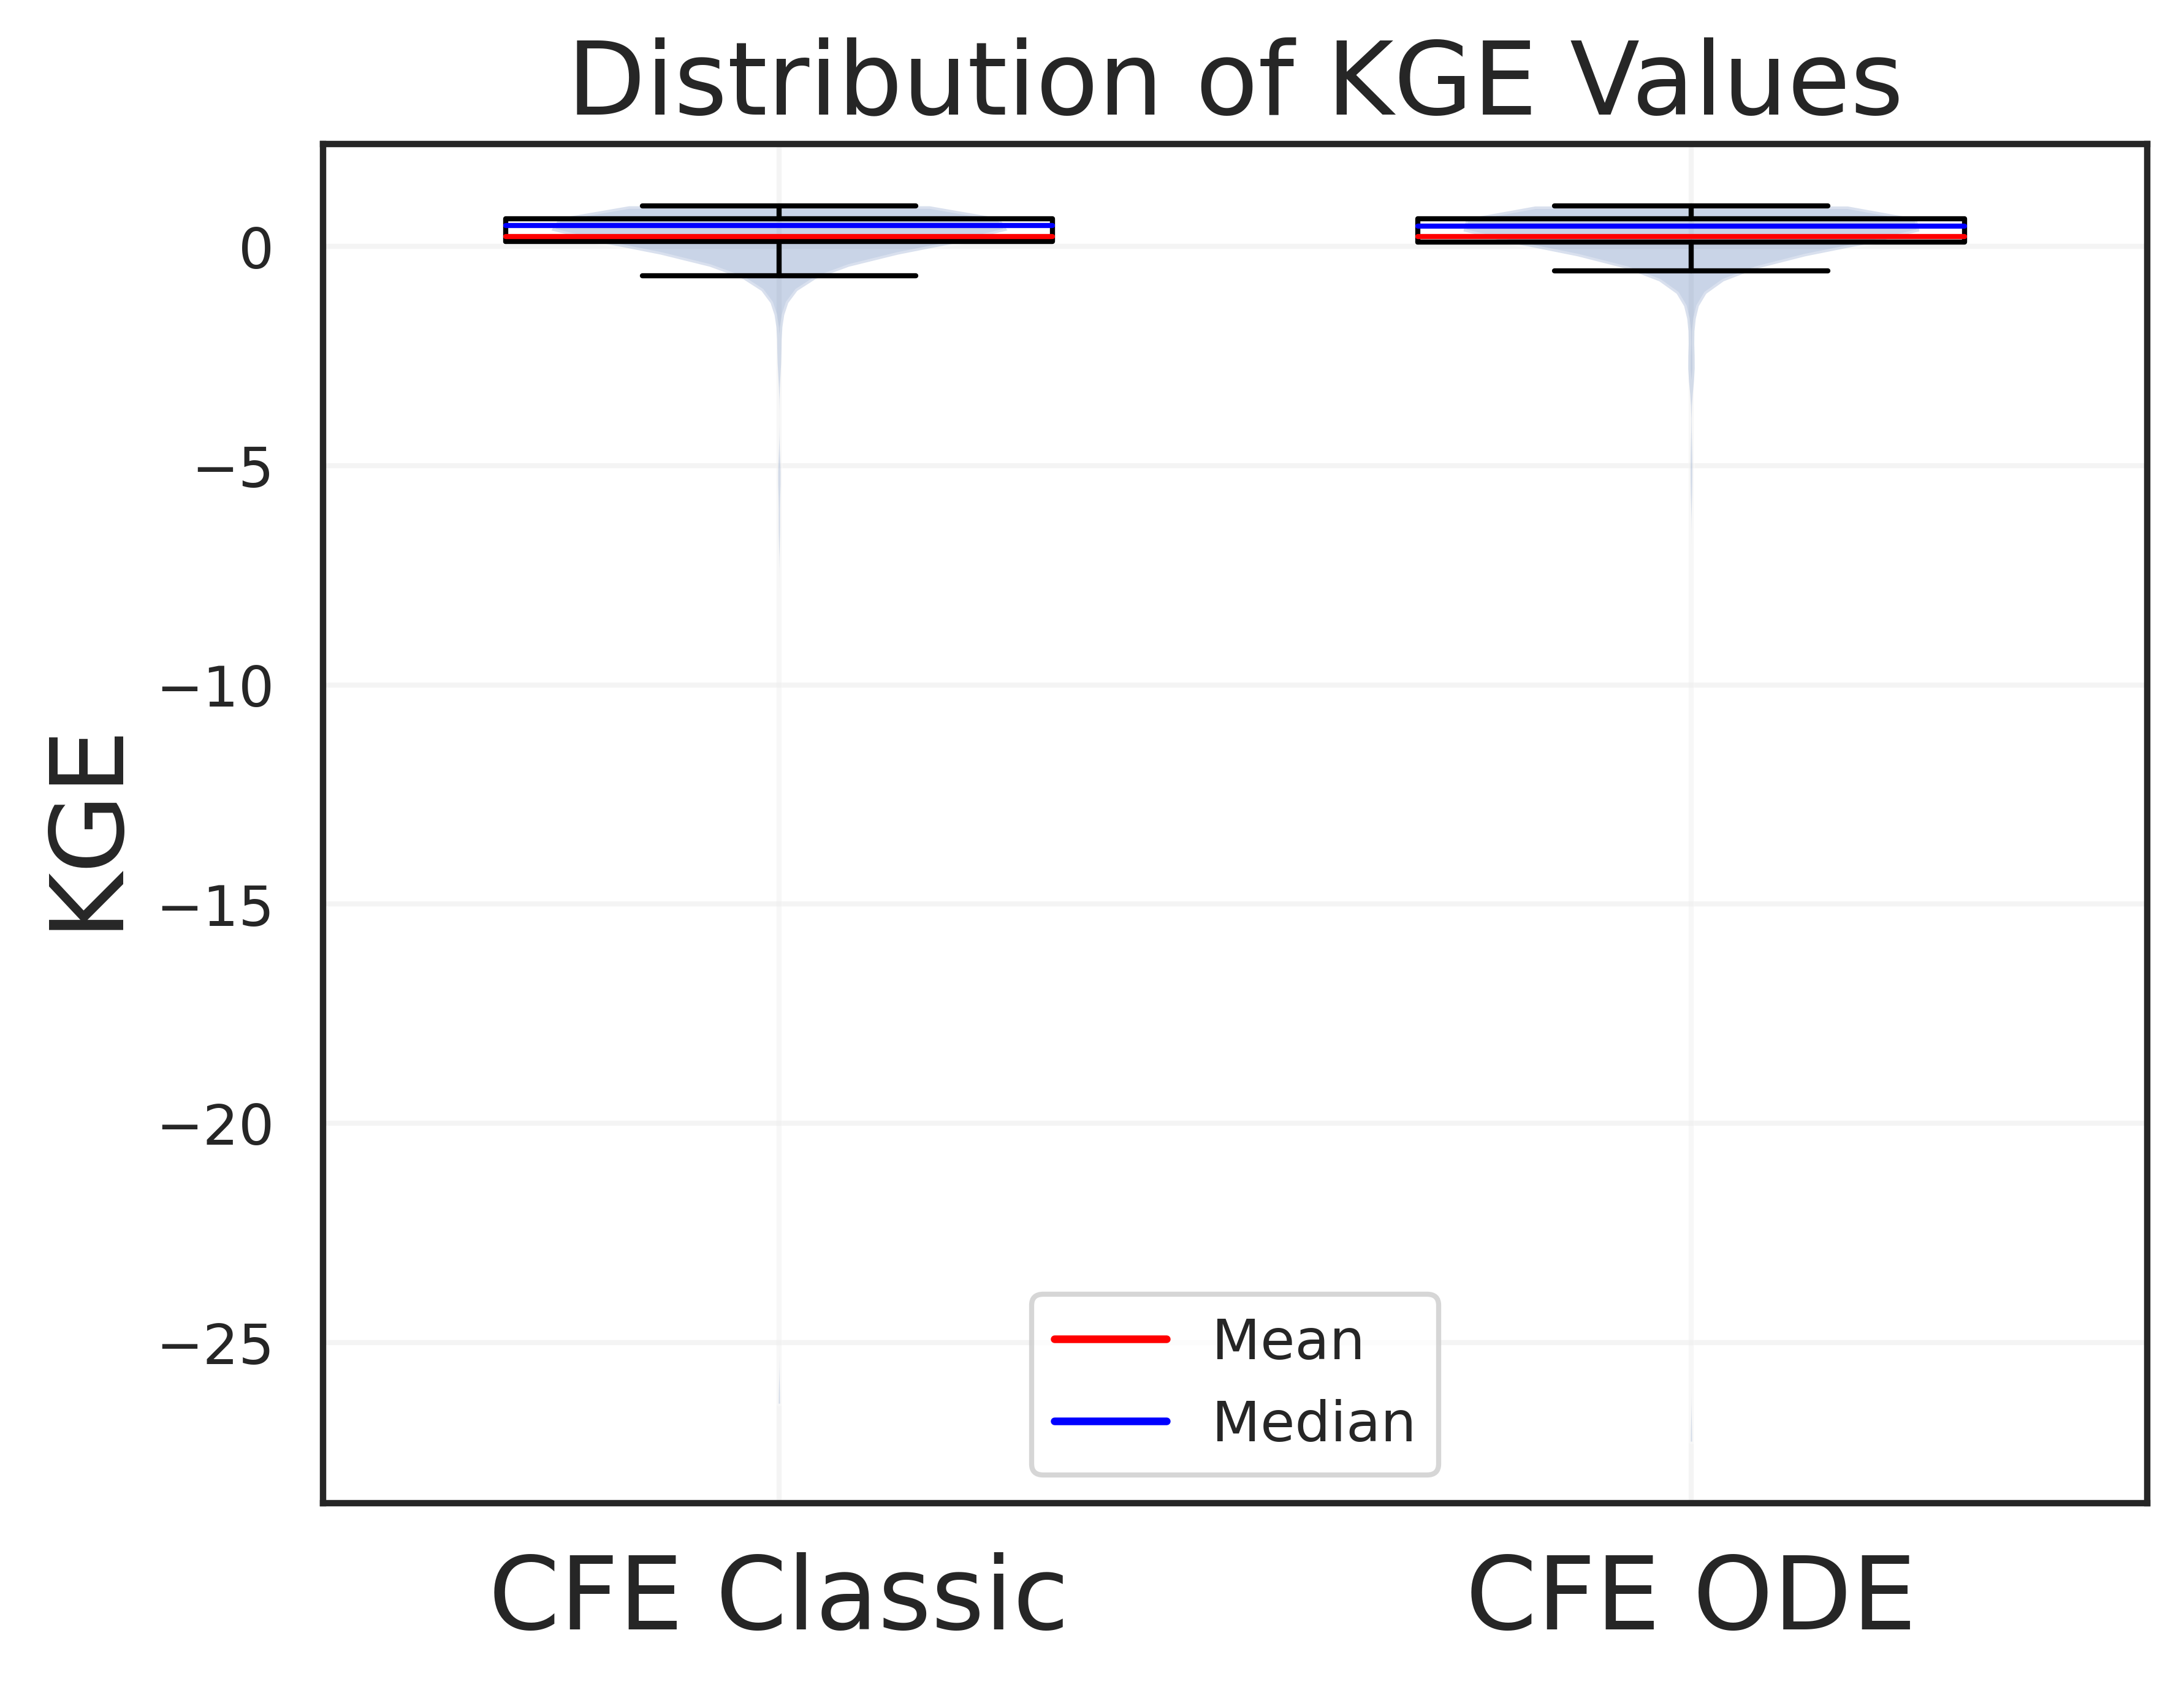

In [29]:
sns.set_style('white')
fig, ax = plt.subplots()
violinplotdata = [kge_classic, kge_ode]
parts = ax.violinplot(violinplotdata, showmeans=False, showmedians=False, showextrema=False)
bp1 = ax.boxplot(kge_classic, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
bp2 = ax.boxplot(kge_ode, positions=[2], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
ax.set_ylim(-2, 1)
ax.set_ylabel('KGE', size=20)
ax.set_title('Distribution of KGE Values', size=20)
bp1['means'][0].set(color='red', linestyle='-')
bp1['medians'][0].set(color='blue')
bp2['means'][0].set(color='red', linestyle='-')
bp2['medians'][0].set(color='blue')
mean_legend = mlines.Line2D([], [], color='red', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', linestyle='-', label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='lower center')
plt.grid(True, linestyle='-', alpha=0.2)
plt.subplots_adjust(wspace=0.1)
plt.savefig('Combined_Violin_Box_KGE.png')
plt.show()

## Spatial Plot with better performing model - KGE

Text(0.5, 1.0, 'Better Performing Model Based on KGE')

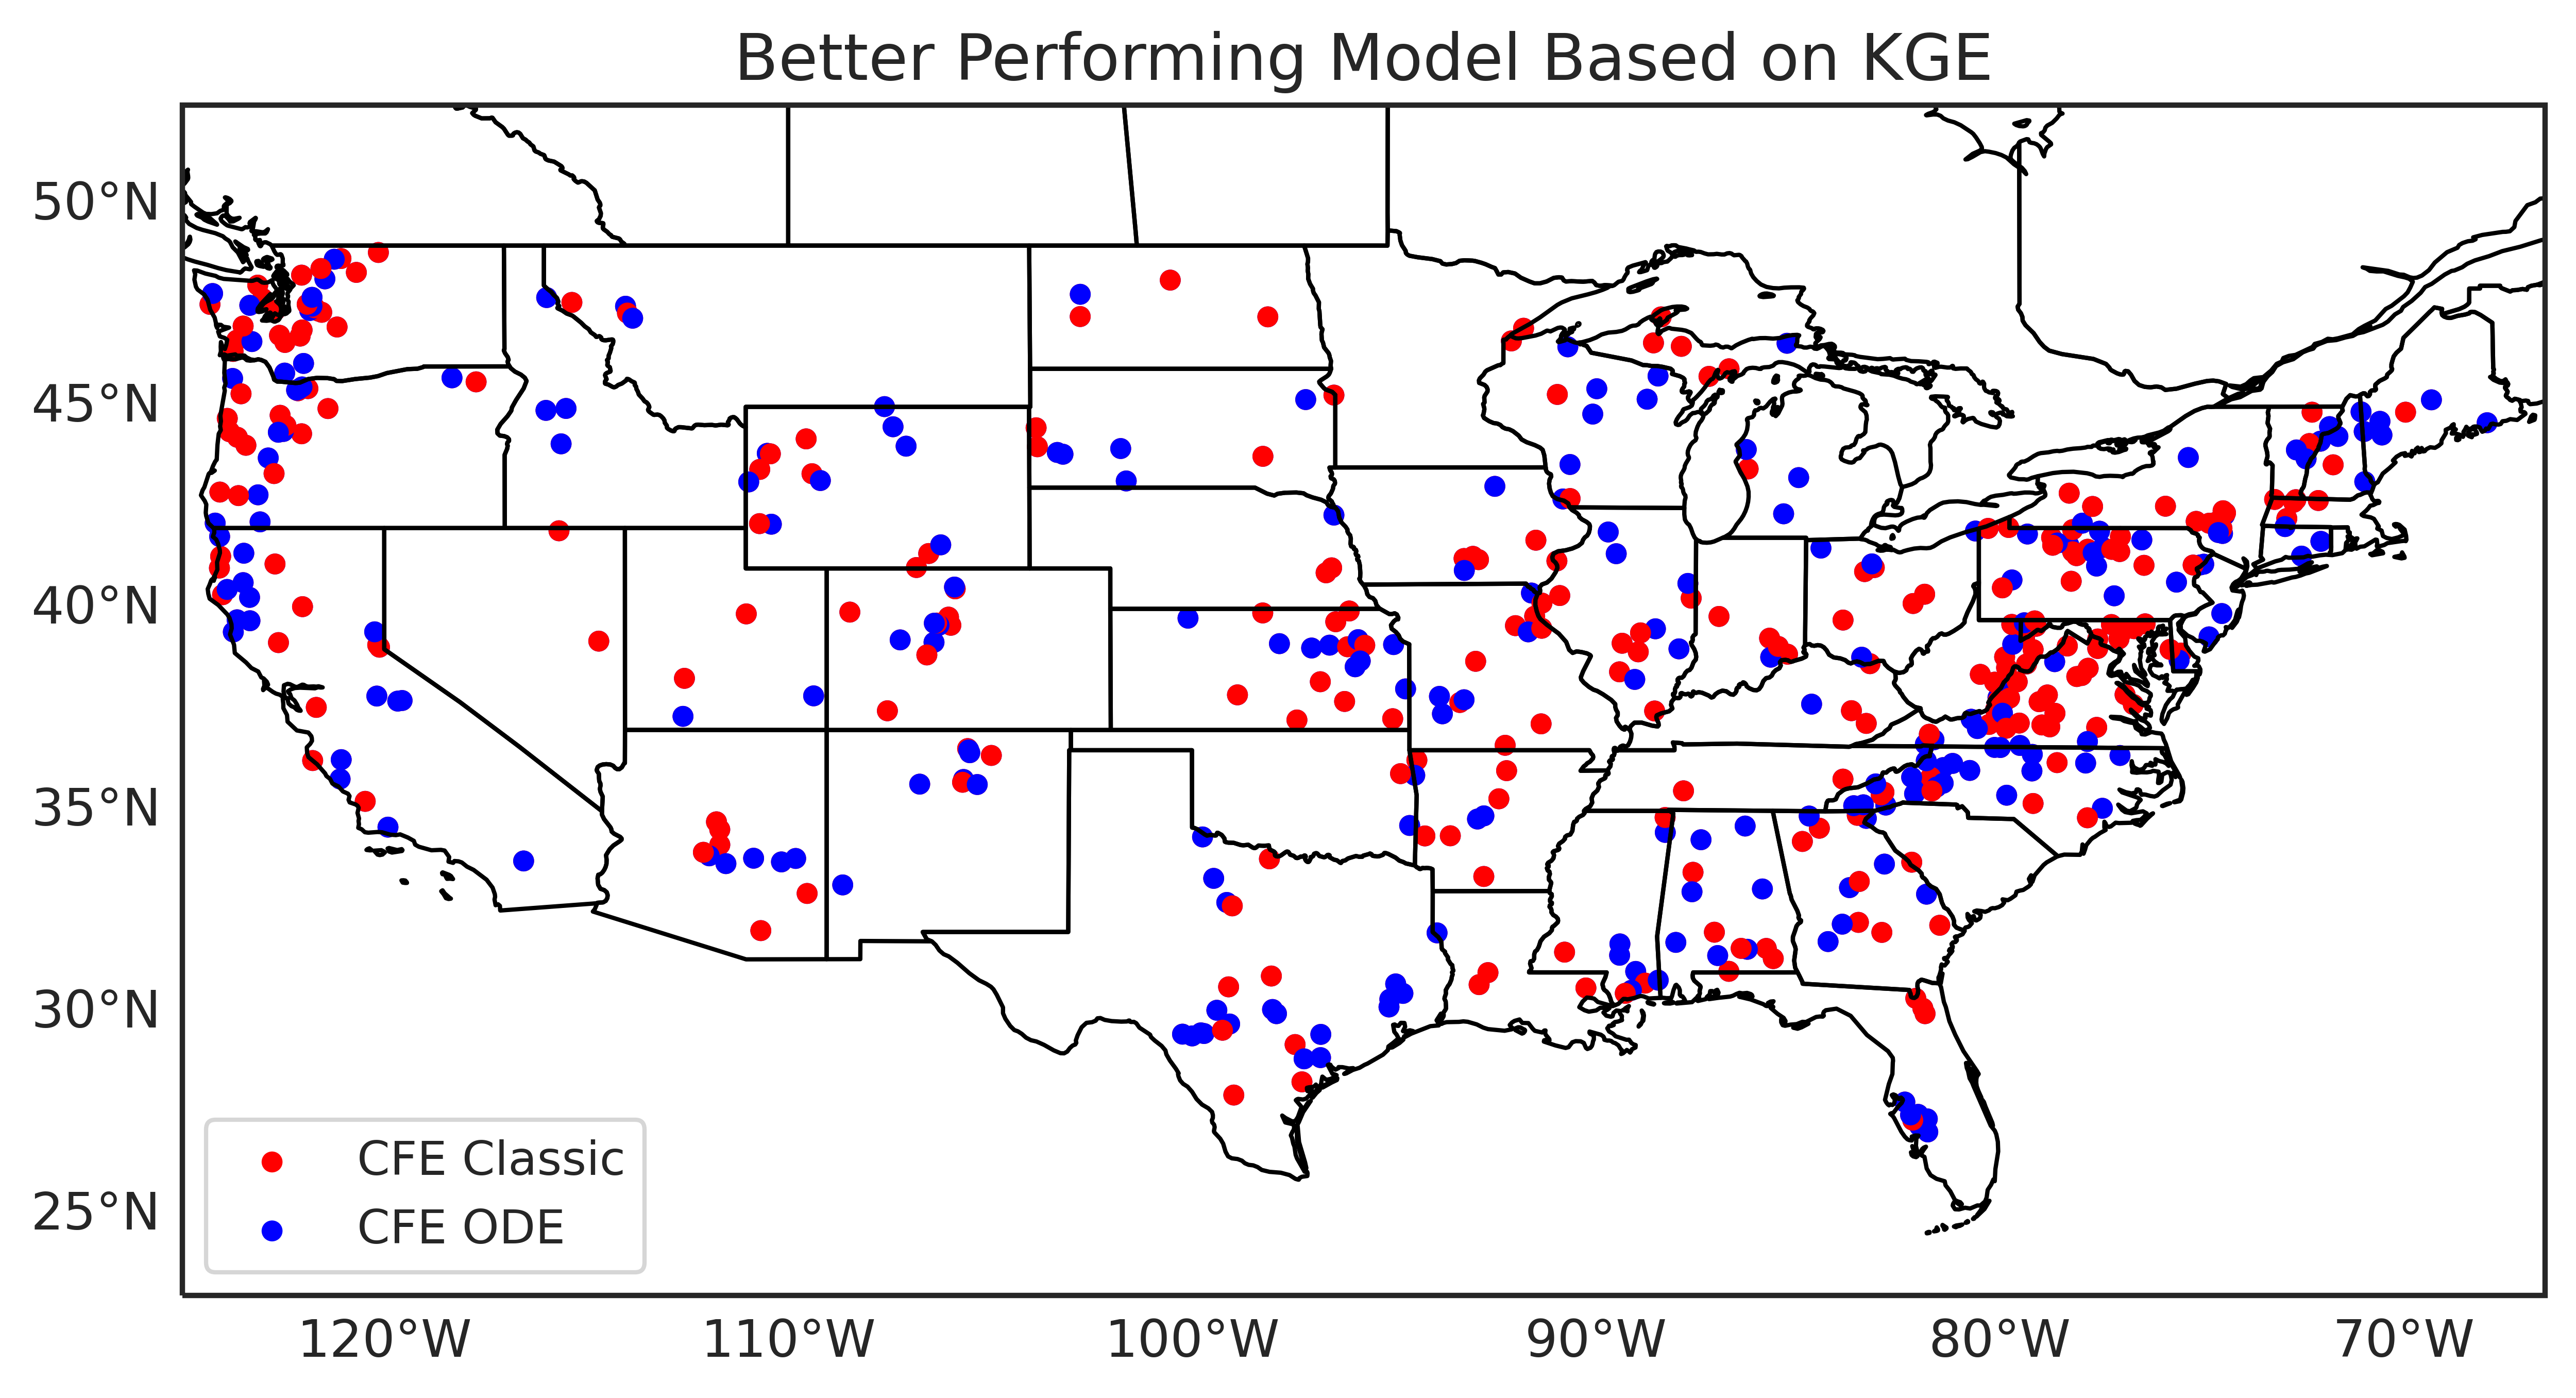

In [13]:
lat_min,lat_max = 23, 49
lon_min,lon_max = -66.5, -125
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 5), dpi=600)
ax = plt.axes(projection=proj)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.STATES)
color_array_classic = np.where(kge_classic > kge_ode, 'red', 'blue')
color_array_ode = np.where(kge_classic > kge_ode, 'blue', 'red')
sc1 = ax.scatter(lon, lat, s=15, c=color_array_classic, transform=proj, label='CFE Classic')
sc2 = ax.scatter(lon, lat, s=15, c=color_array_ode, transform=proj, label='CFE ODE')
scatter_legend_handler = HandlerPathCollection()
legend_labels = ['CFE Classic', 'CFE ODE']
plt.legend([sc1, sc2], legend_labels, handler_map={type(sc1): scatter_legend_handler}, loc='lower left')
gl = ax.gridlines(draw_labels=True, color='None')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
plt.title('Better Performing Model Based on KGE', size=15)

## Relationship between CFE Classic and CFE ODE based on NSE

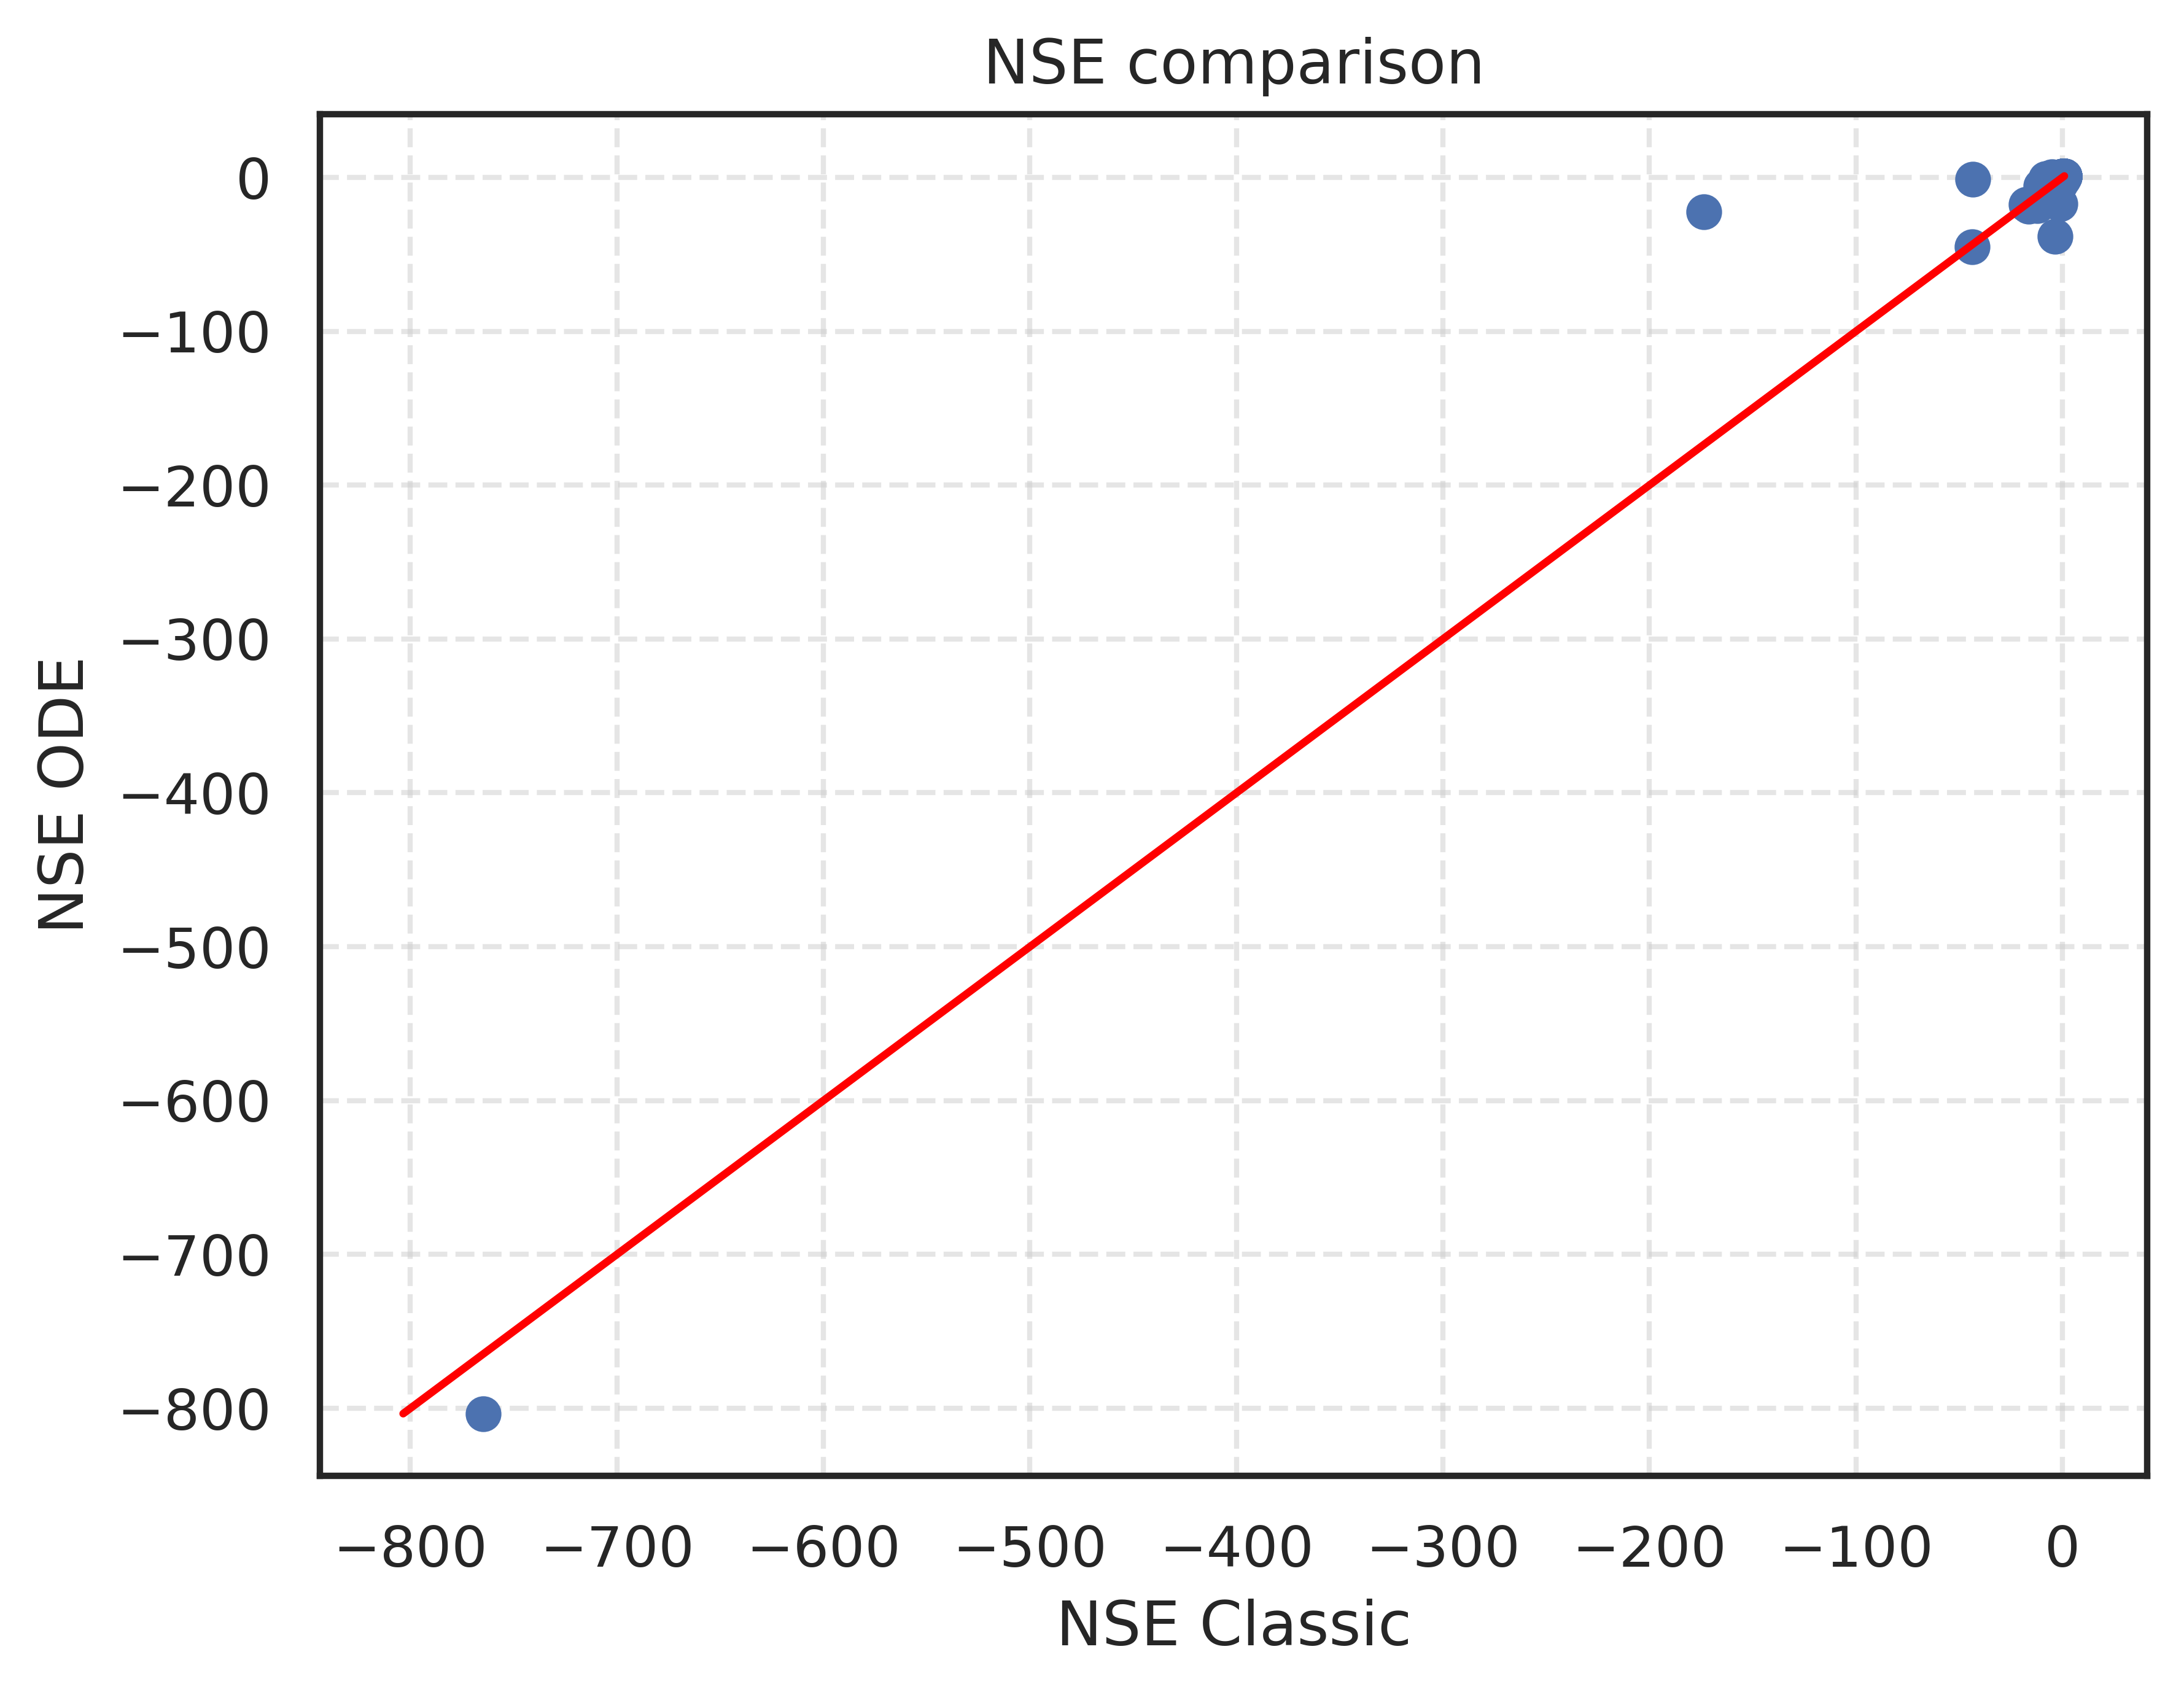

In [14]:
plt.scatter(nse_classic, nse_ode)
plt.xlabel('NSE Classic')
plt.ylabel('NSE ODE')
min_val = min(min(nse_classic), min(nse_ode))
max_val = max(max(nse_classic), max(nse_ode))
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.title('NSE comparison')
plt.grid(True, linestyle='--', alpha=0.5)

## Sorting values for CDF Plot

In [15]:
sorted_nse_classic = np.sort(nse_classic)
sorted_nse_ode = np.sort(nse_ode)
cum_prob_nse_classic = np.arange(len(sorted_nse_classic)) / float(len(sorted_nse_classic))
cum_prob_nse_ode = np.arange(len(sorted_nse_ode)) / float(len(sorted_nse_ode))

## Calculating mean and median values for CDF

In [16]:
nse_median_classic = np.median(nse_classic)
nse_median_ode = np.median(nse_ode)
print(f'CFE Classic Median NSE: {nse_median_classic}')
print(f'CFE ODE Median NSE: {nse_median_ode}')

CFE Classic Median NSE: 0.21262045000000002
CFE ODE Median NSE: 0.22248647


## CDF Plot - NSE

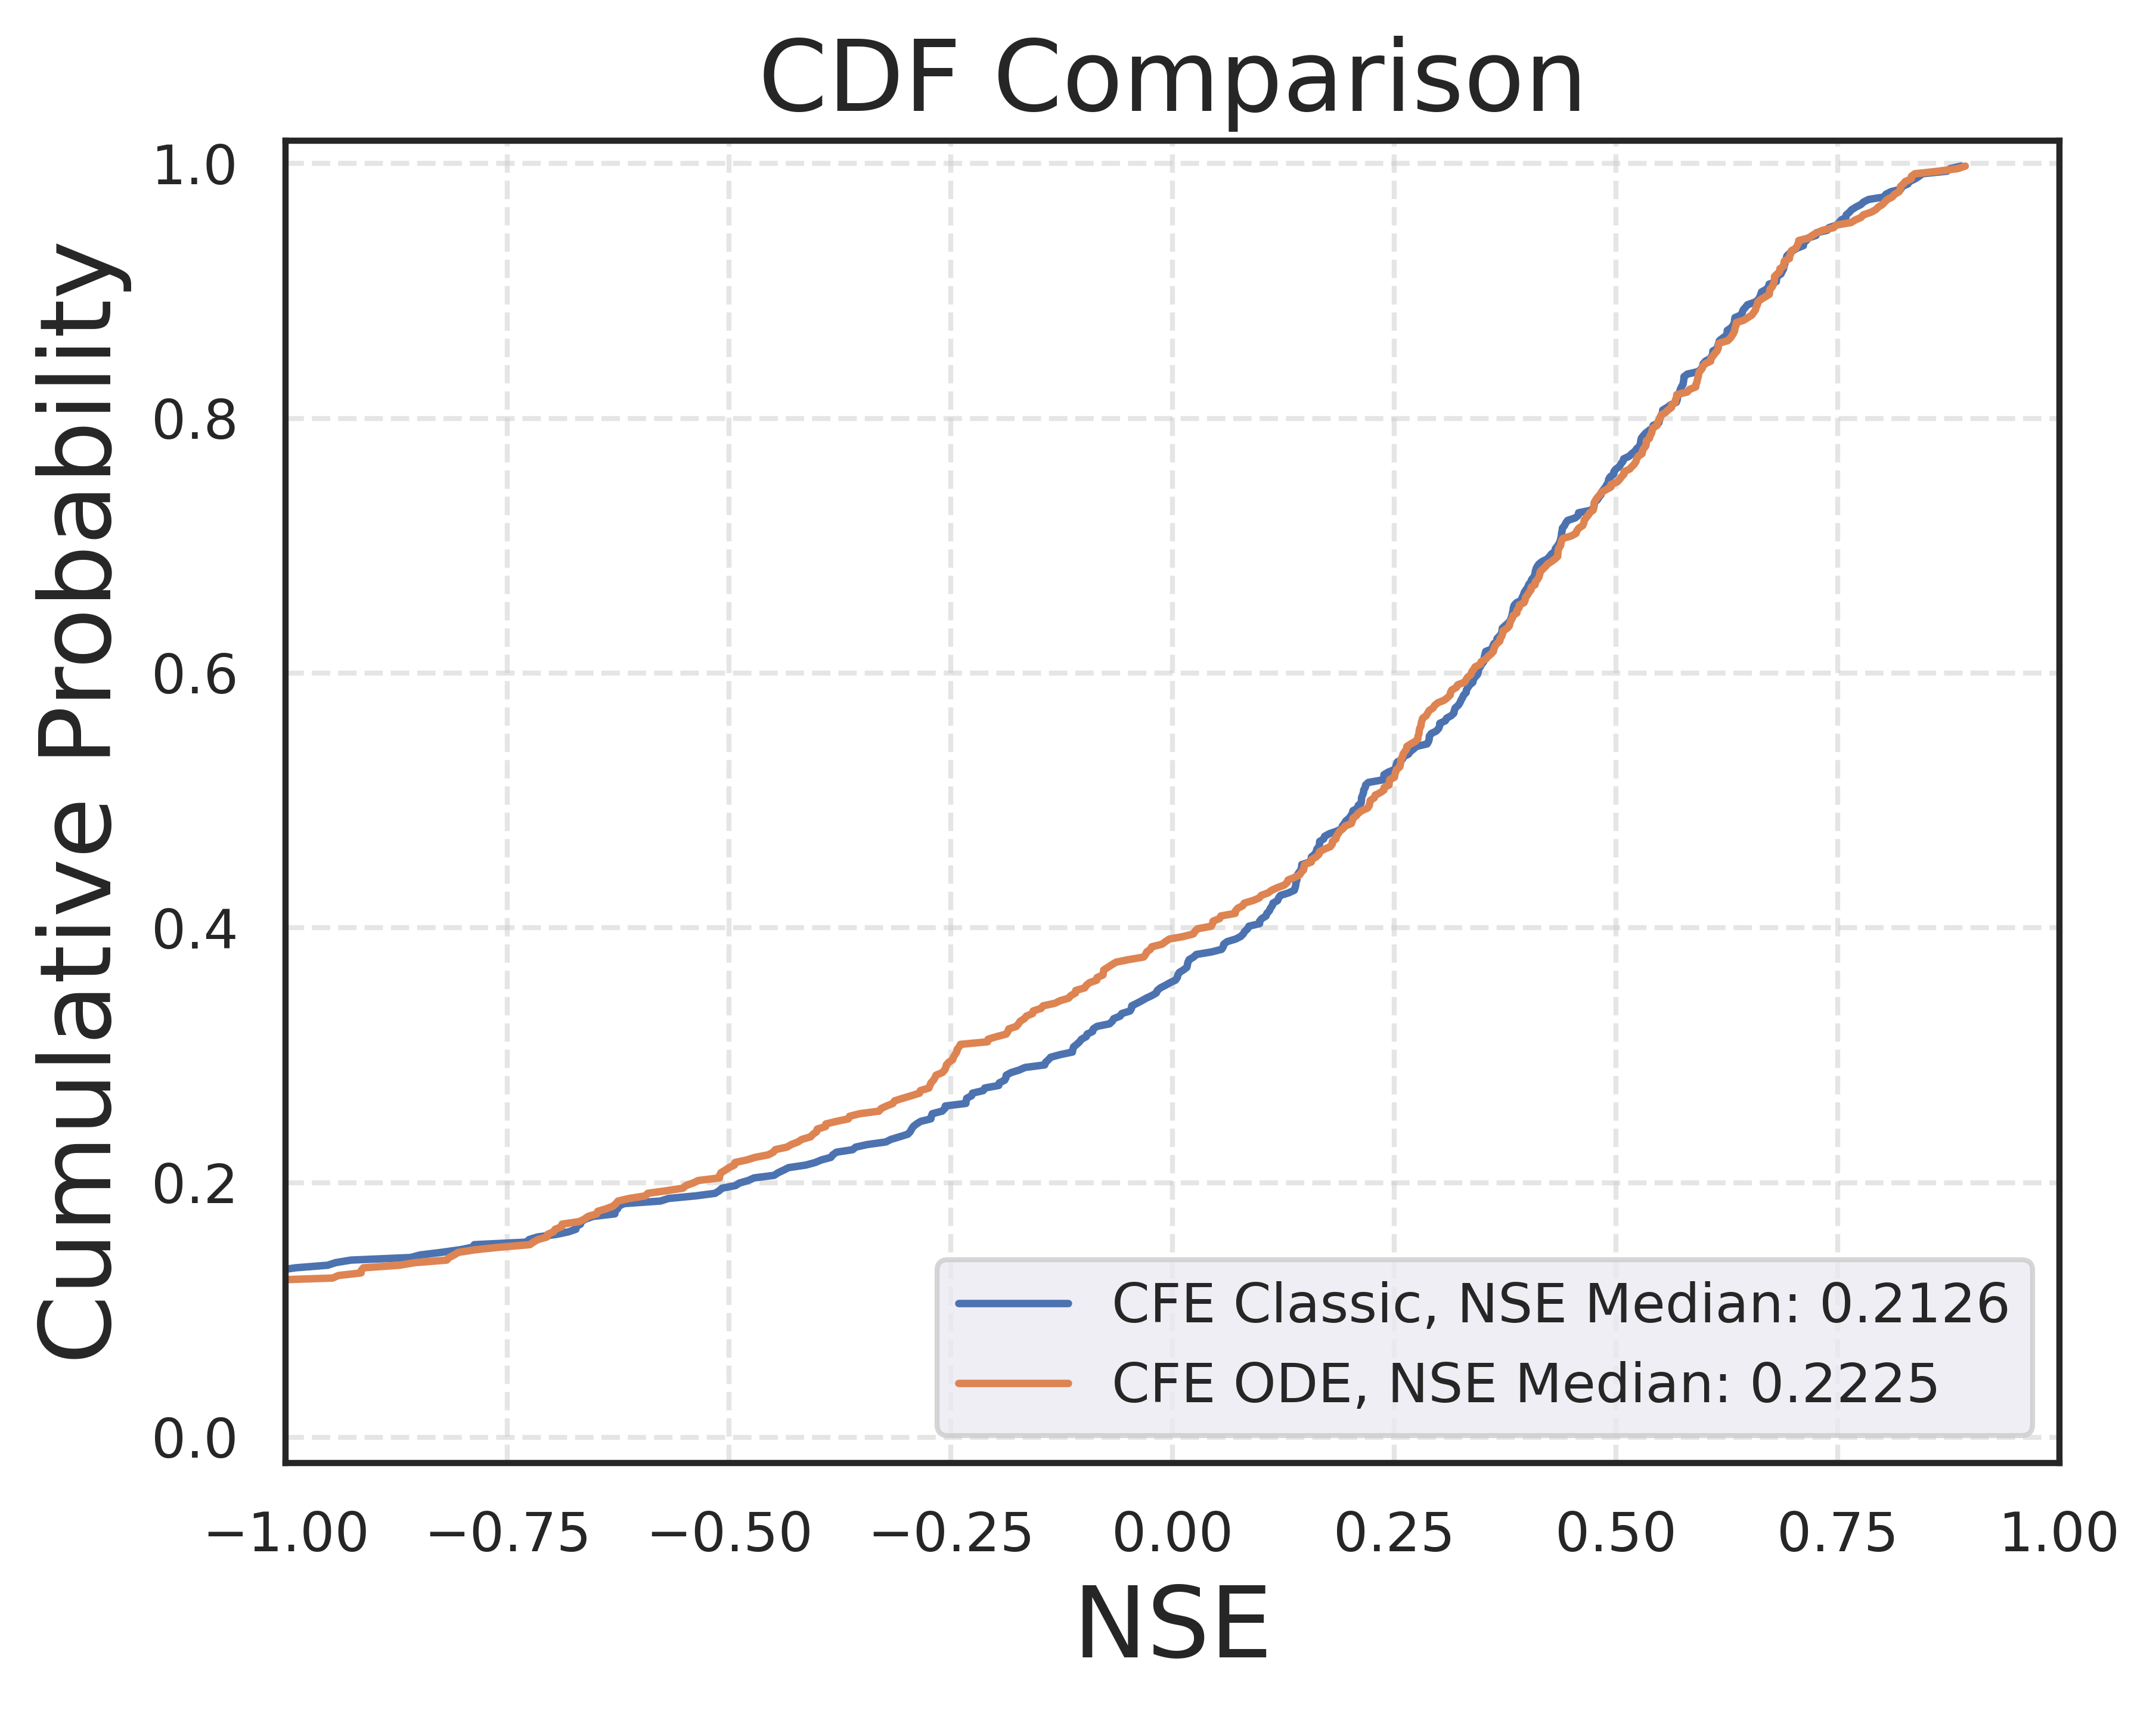

<Figure size 3840x2880 with 0 Axes>

In [17]:
sns.set_style('white')
plt.plot(sorted_nse_classic, cum_prob_nse_classic, label=f'CFE Classic, NSE Median: {nse_median_classic:.4f}')
plt.plot(sorted_nse_ode, cum_prob_nse_ode, label=f'CFE ODE, NSE Median: {nse_median_ode:.4f}')
sns.set_theme(style='darkgrid')
plt.xlabel('NSE', size=20)
plt.ylabel('Cumulative Probability', size=20)
plt.title('CDF Comparison', size=20)
plt.xlim(-1,1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.margins(0.02)
plt.show()
plt.savefig('CDF NSE')

## NSE-Aridity Plot

<Figure size 3840x2880 with 0 Axes>

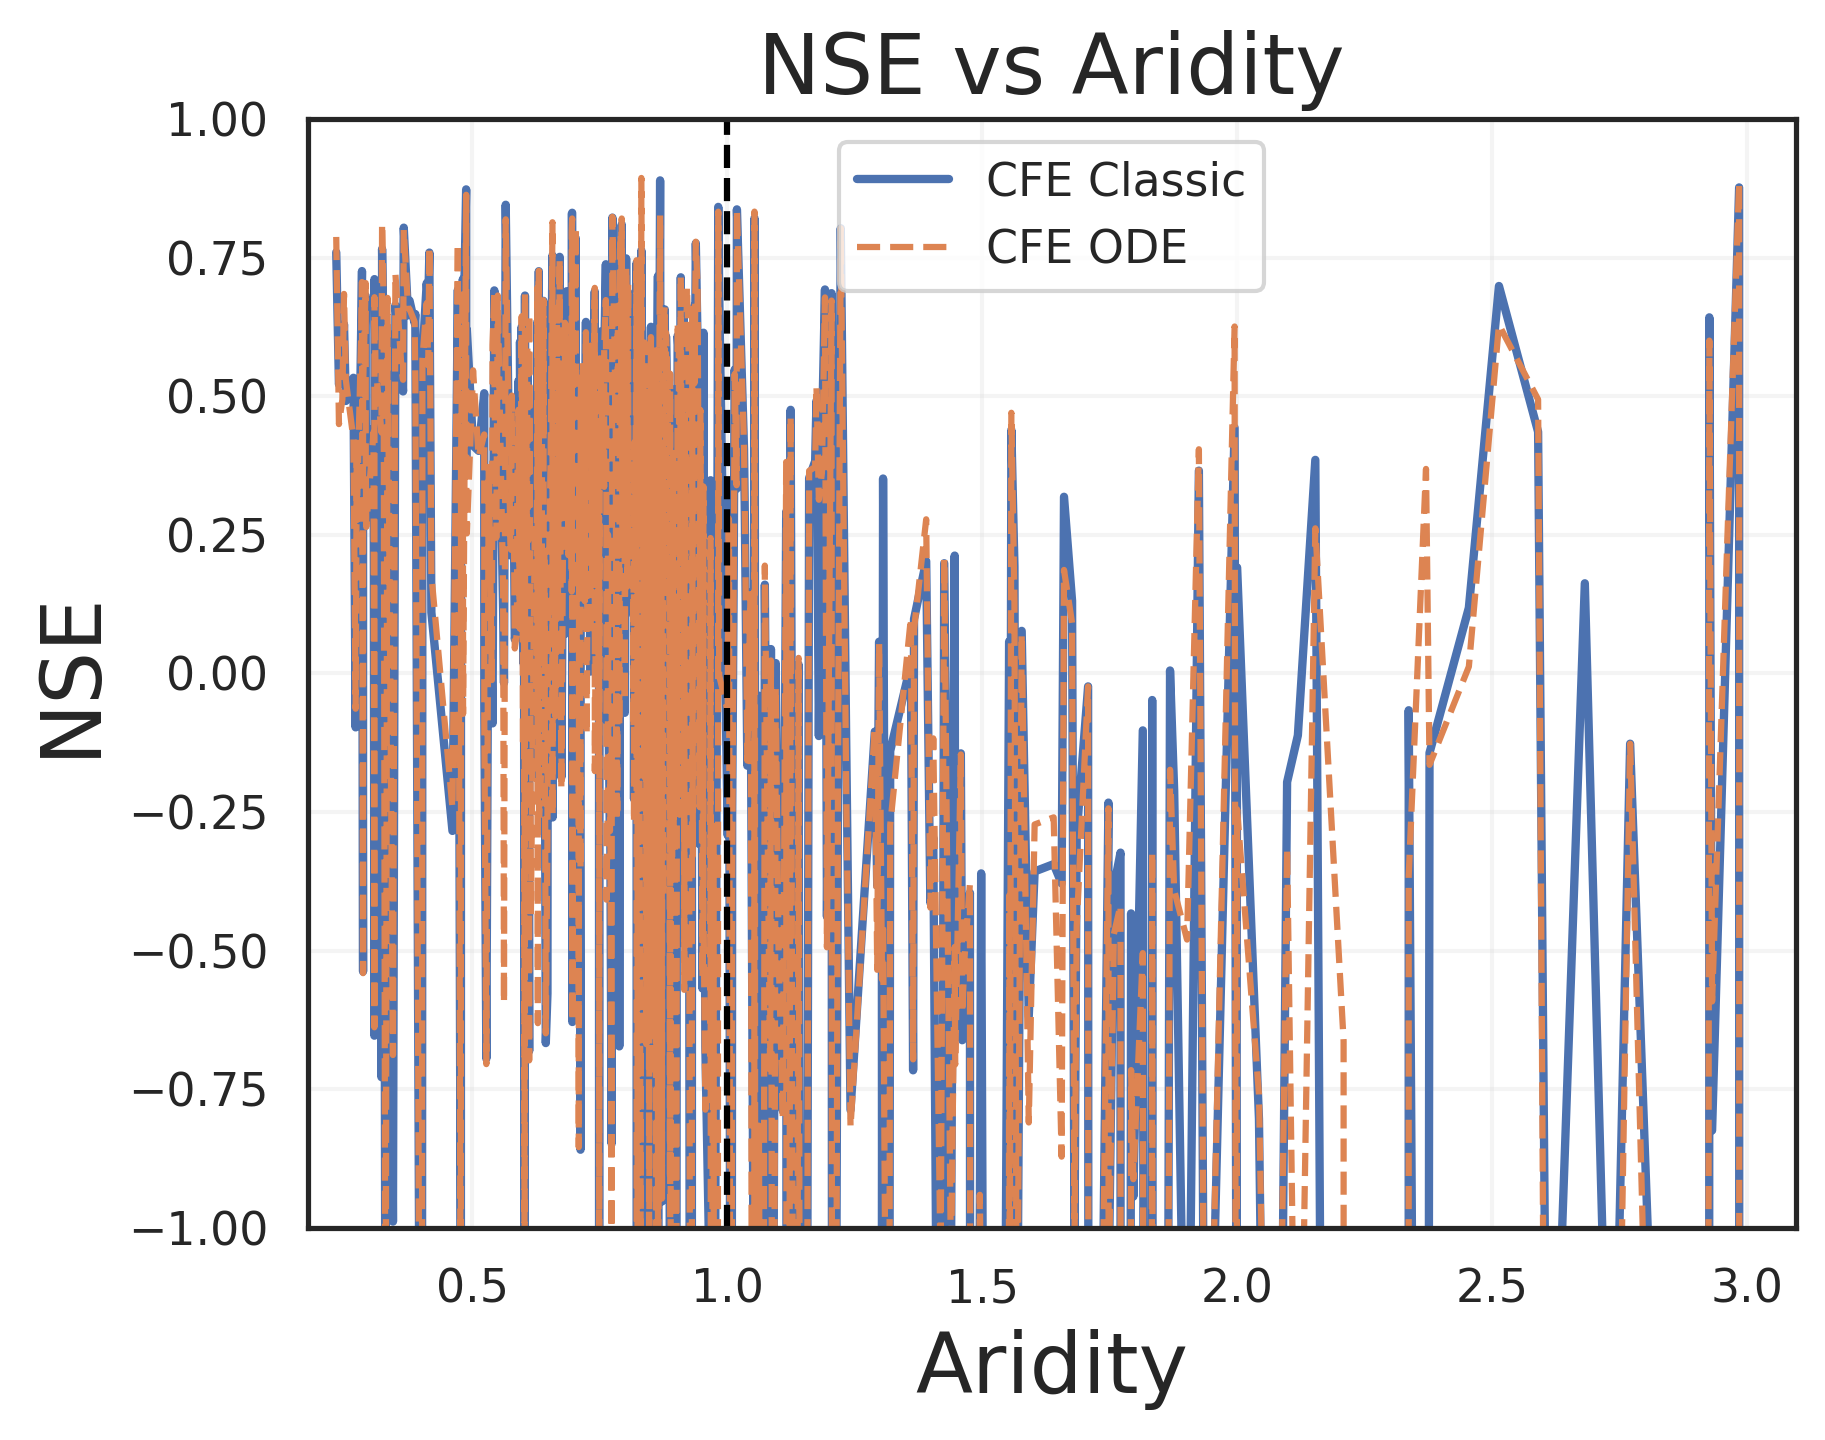

In [18]:
sns.set_style('white')
fig = plt.figure(dpi=600)
df_sorted_by_aridity = df.sort_values ('aridity')
sorted_aridity = df_sorted_by_aridity['aridity']
nse_classic_sorted_by_aridity = df_sorted_by_aridity['nse_classic']
nse_ode_sorted_by_aridity = df_sorted_by_aridity['nse_ode']
fig = plt.figure(dpi=300)
plt.plot(sorted_aridity, nse_classic_sorted_by_aridity, linewidth=2)
plt.plot(sorted_aridity, nse_ode_sorted_by_aridity, linestyle='--', linewidth=1.5)
plt.ylim(-1,1)
plt.axvline(x=1, color='black', linestyle='--')
plt.legend(['CFE Classic','CFE ODE'], loc='upper center')
plt.xlabel('Aridity', size=20)
plt.ylabel('NSE', size=20)
plt.title('NSE vs Aridity', size=20)
plt.grid(True, linestyle='-', alpha=0.2)
plt.margins(0.02)
plt.savefig('Aridity NSE')

## Violin Plot - NSE

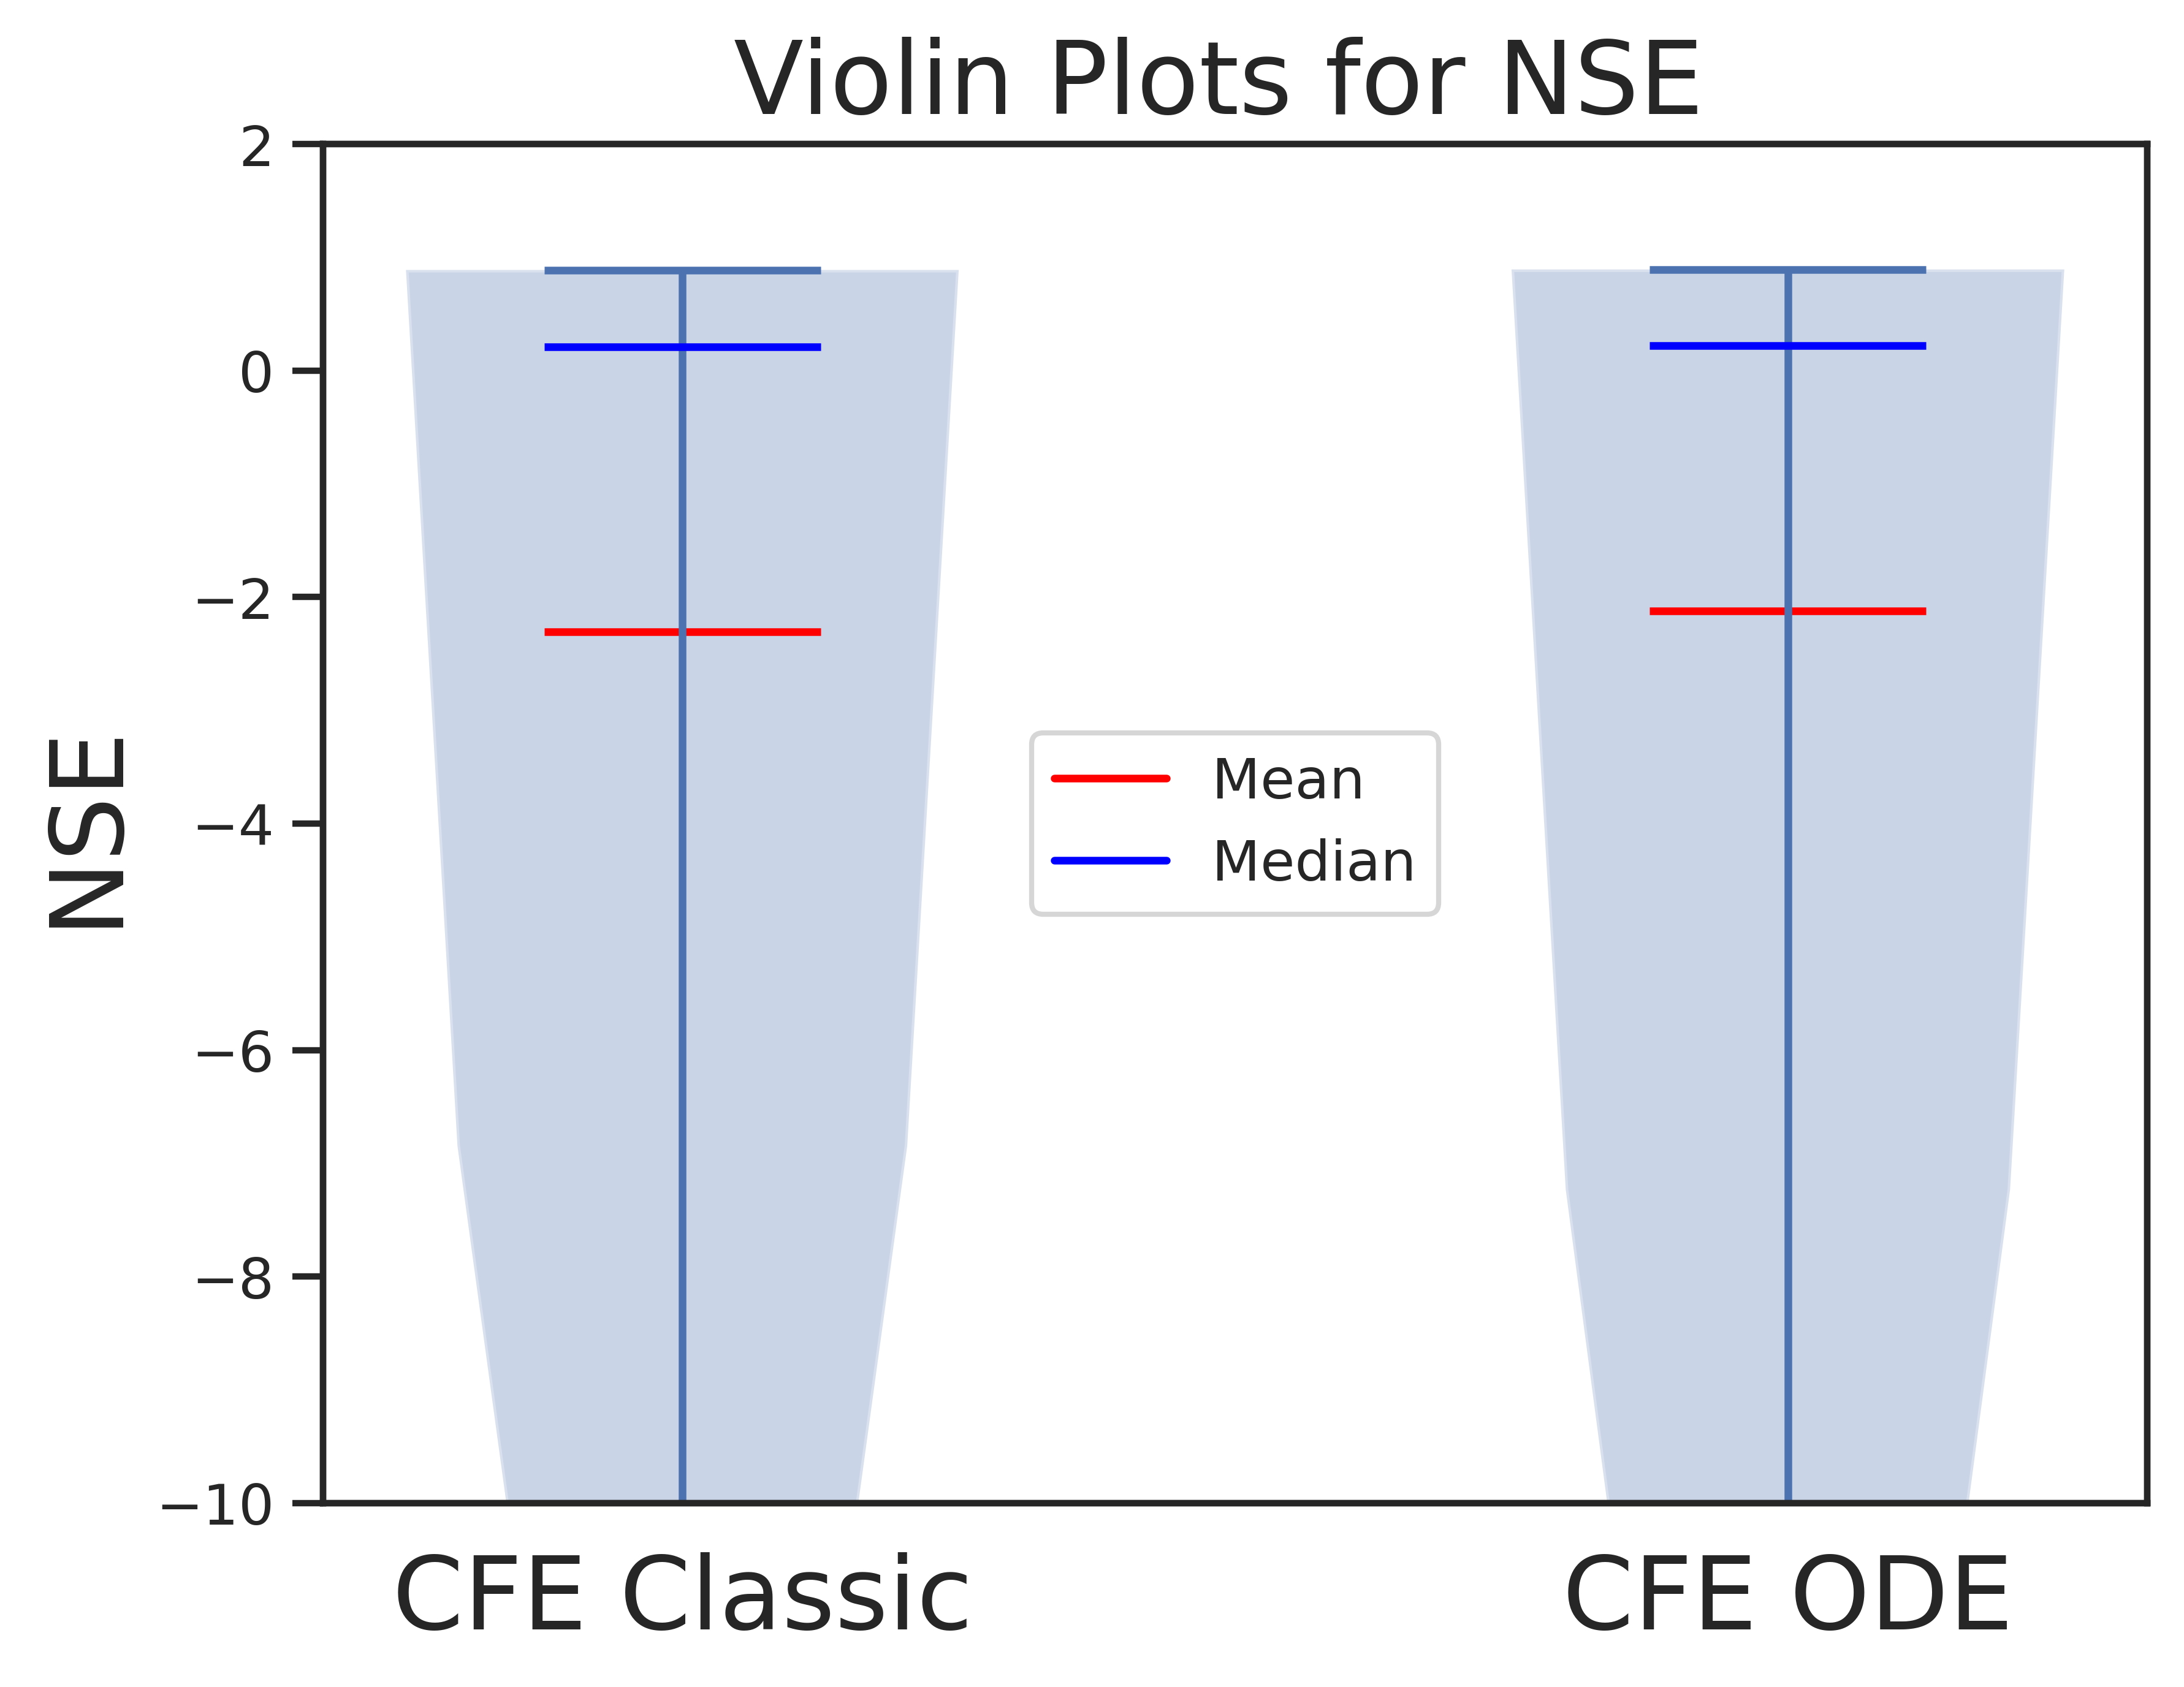

<Figure size 3840x2880 with 0 Axes>

In [30]:
violinplotdata = [nse_classic, nse_ode]
fig, ax = plt.subplots()
parts = ax.violinplot(violinplotdata, showmeans=True, showmedians=True)
parts['cmeans'].set_color('red')
parts['cmedians'].set_color('blue')
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
ax.set_ylim(-10, 2)
ax.set_ylabel('NSE', size=20)
ax2 = ax.twinx()
ax2.yaxis.set_visible(False)
ax.set_title('Violin Plots for NSE ', size=20)
mean_legend = mlines.Line2D([], [], color='red', marker='None', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', marker='None', linestyle='-', markersize=5, label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='center')
plt.subplots_adjust(wspace=0.1)
plt.grid(True, linestyle='-', alpha=0.2)
plt.show()
plt.savefig('Violin NSE')

## Box Plot - NSE

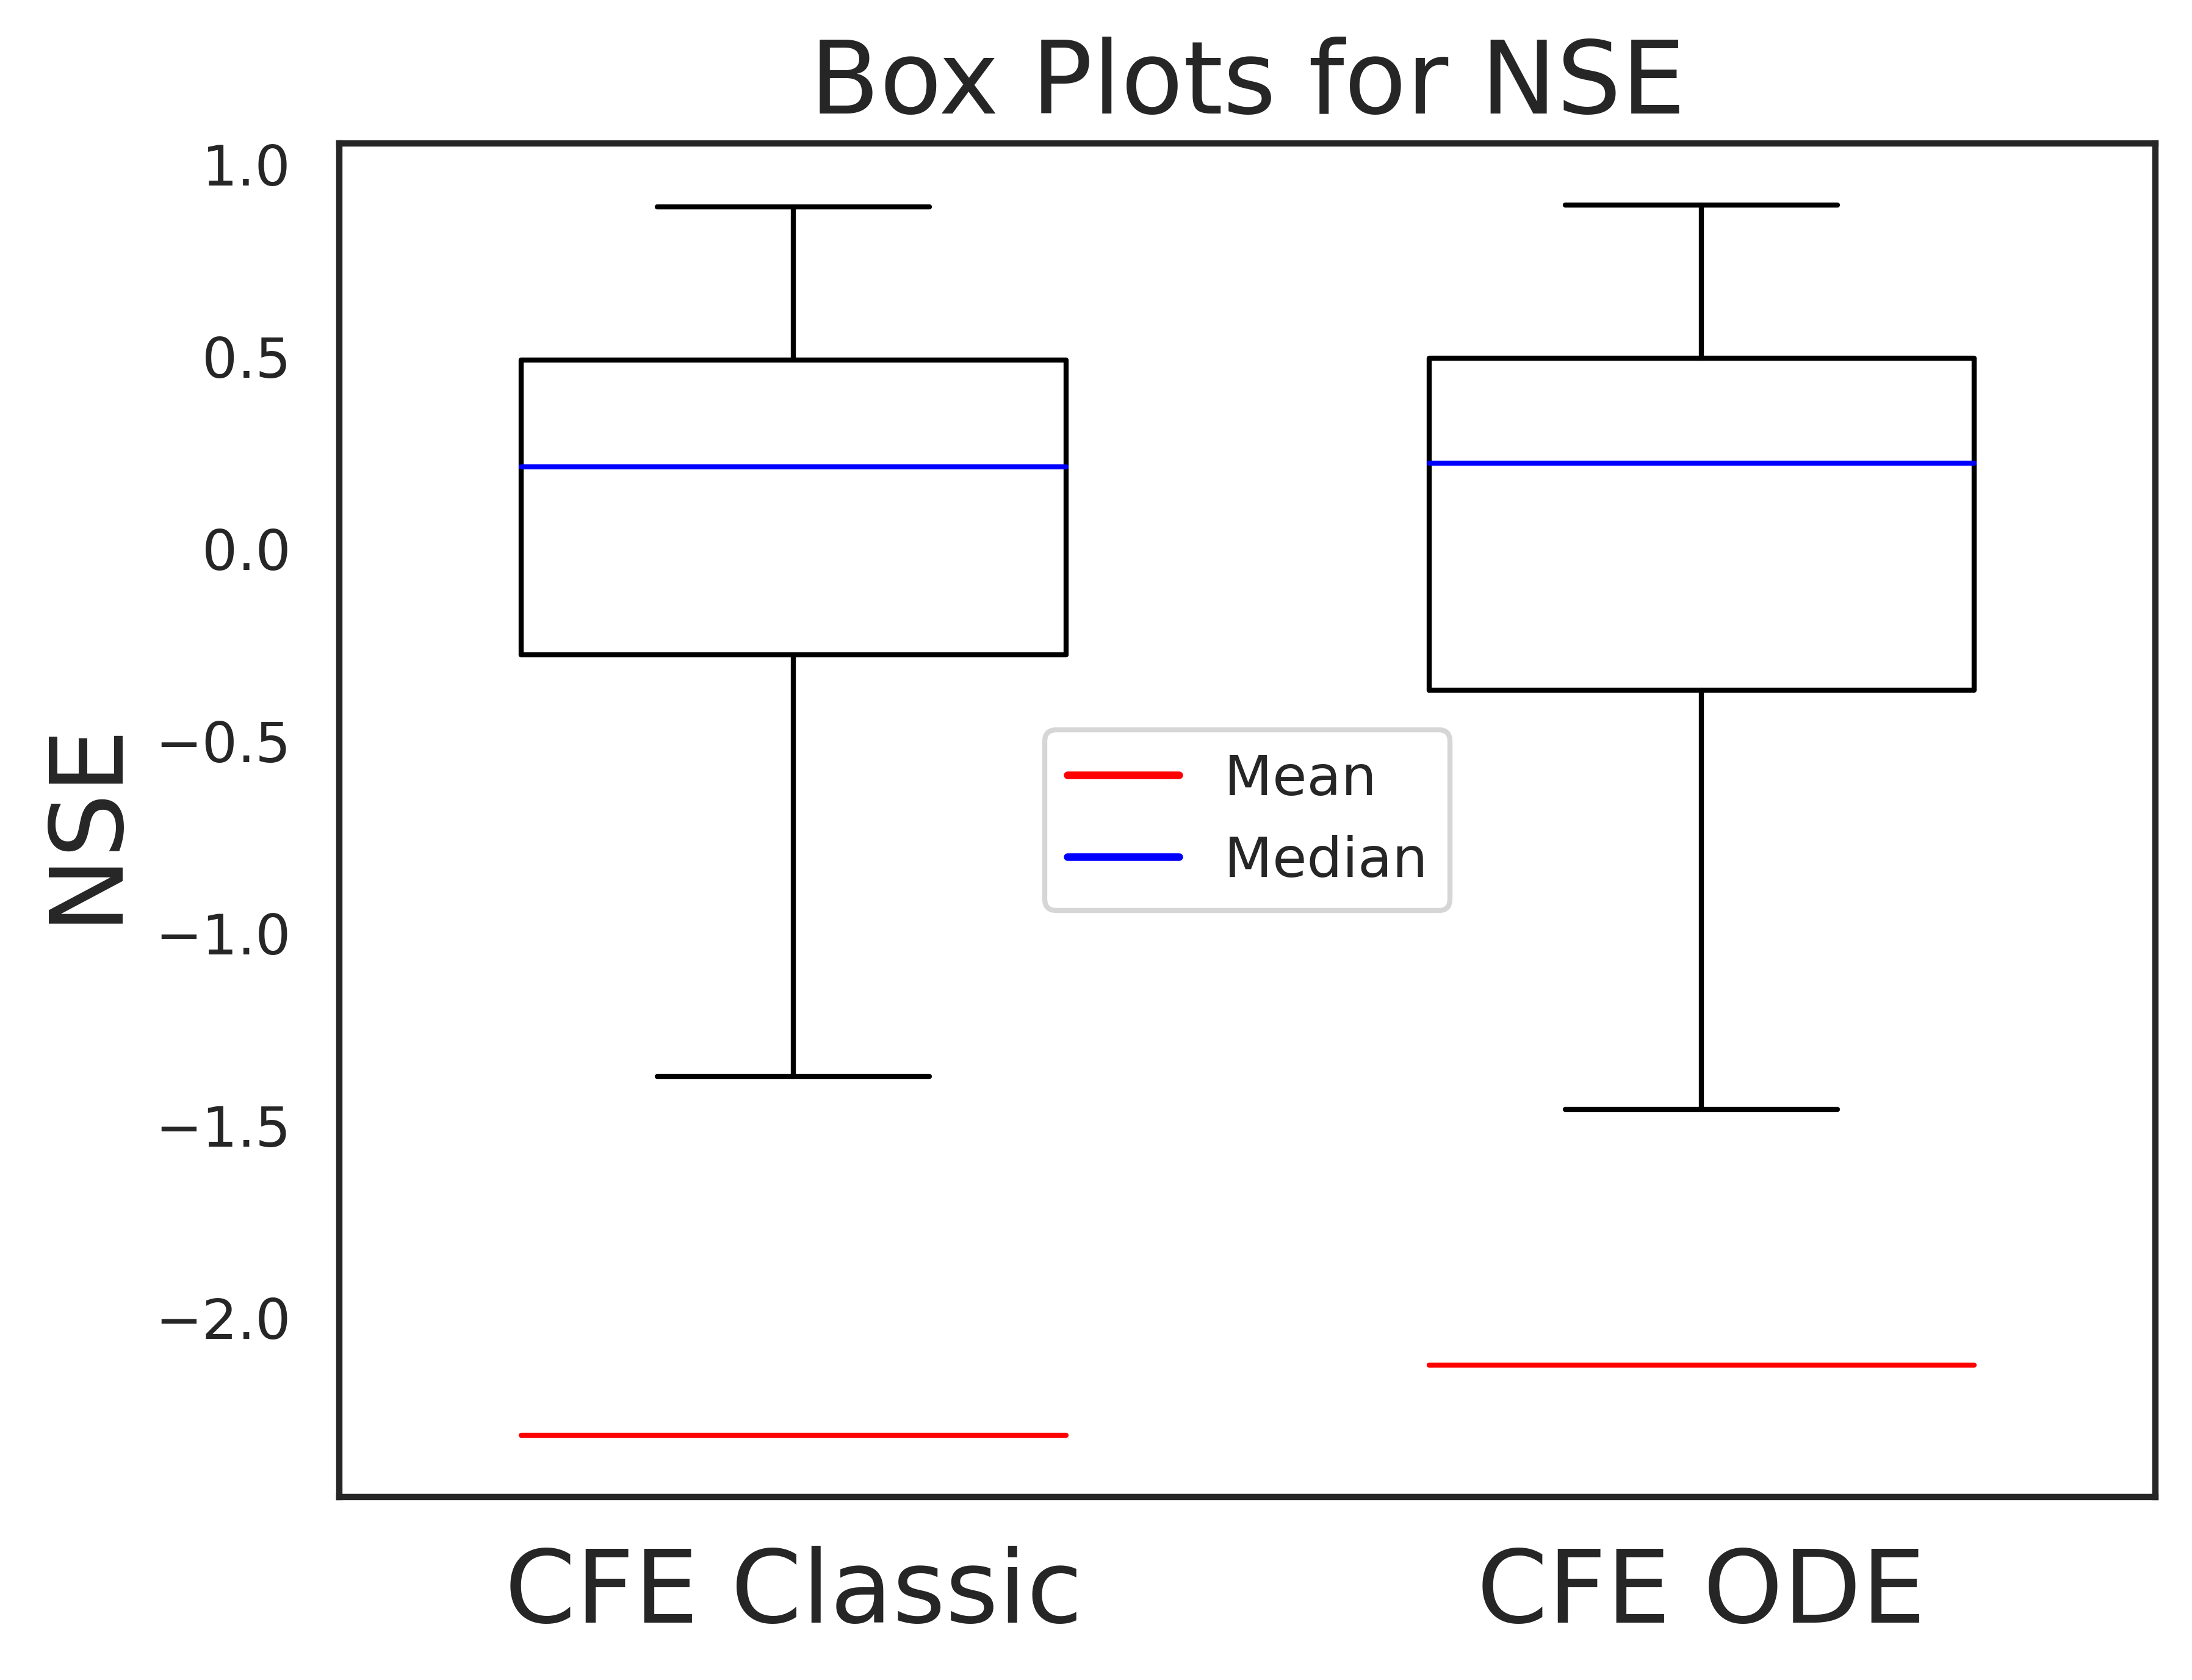

<Figure size 3840x2880 with 0 Axes>

In [20]:
fig, ax = plt.subplots()
bp1 = ax.boxplot(nse_classic, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
bp2 = ax.boxplot(nse_ode, positions=[2], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
#ax.set_yticks([-6, -5, -4, -3, -2, -1, 0, 1])
ax.set_ylabel('NSE', size=20)
ax.set_title('Box Plots for NSE', size=20)
#ax.set_ylim(-10,1)
bp1['means'][0].set(color='red', linestyle='-')
bp1['medians'][0].set(color='blue')
bp2['means'][0].set(color='red', linestyle='-')
bp2['medians'][0].set(color='blue')
mean_legend = mlines.Line2D([], [], color='red', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', linestyle='-', label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='center')
plt.show()
plt.savefig('Box NSE')

## Distribution Plot - NSE

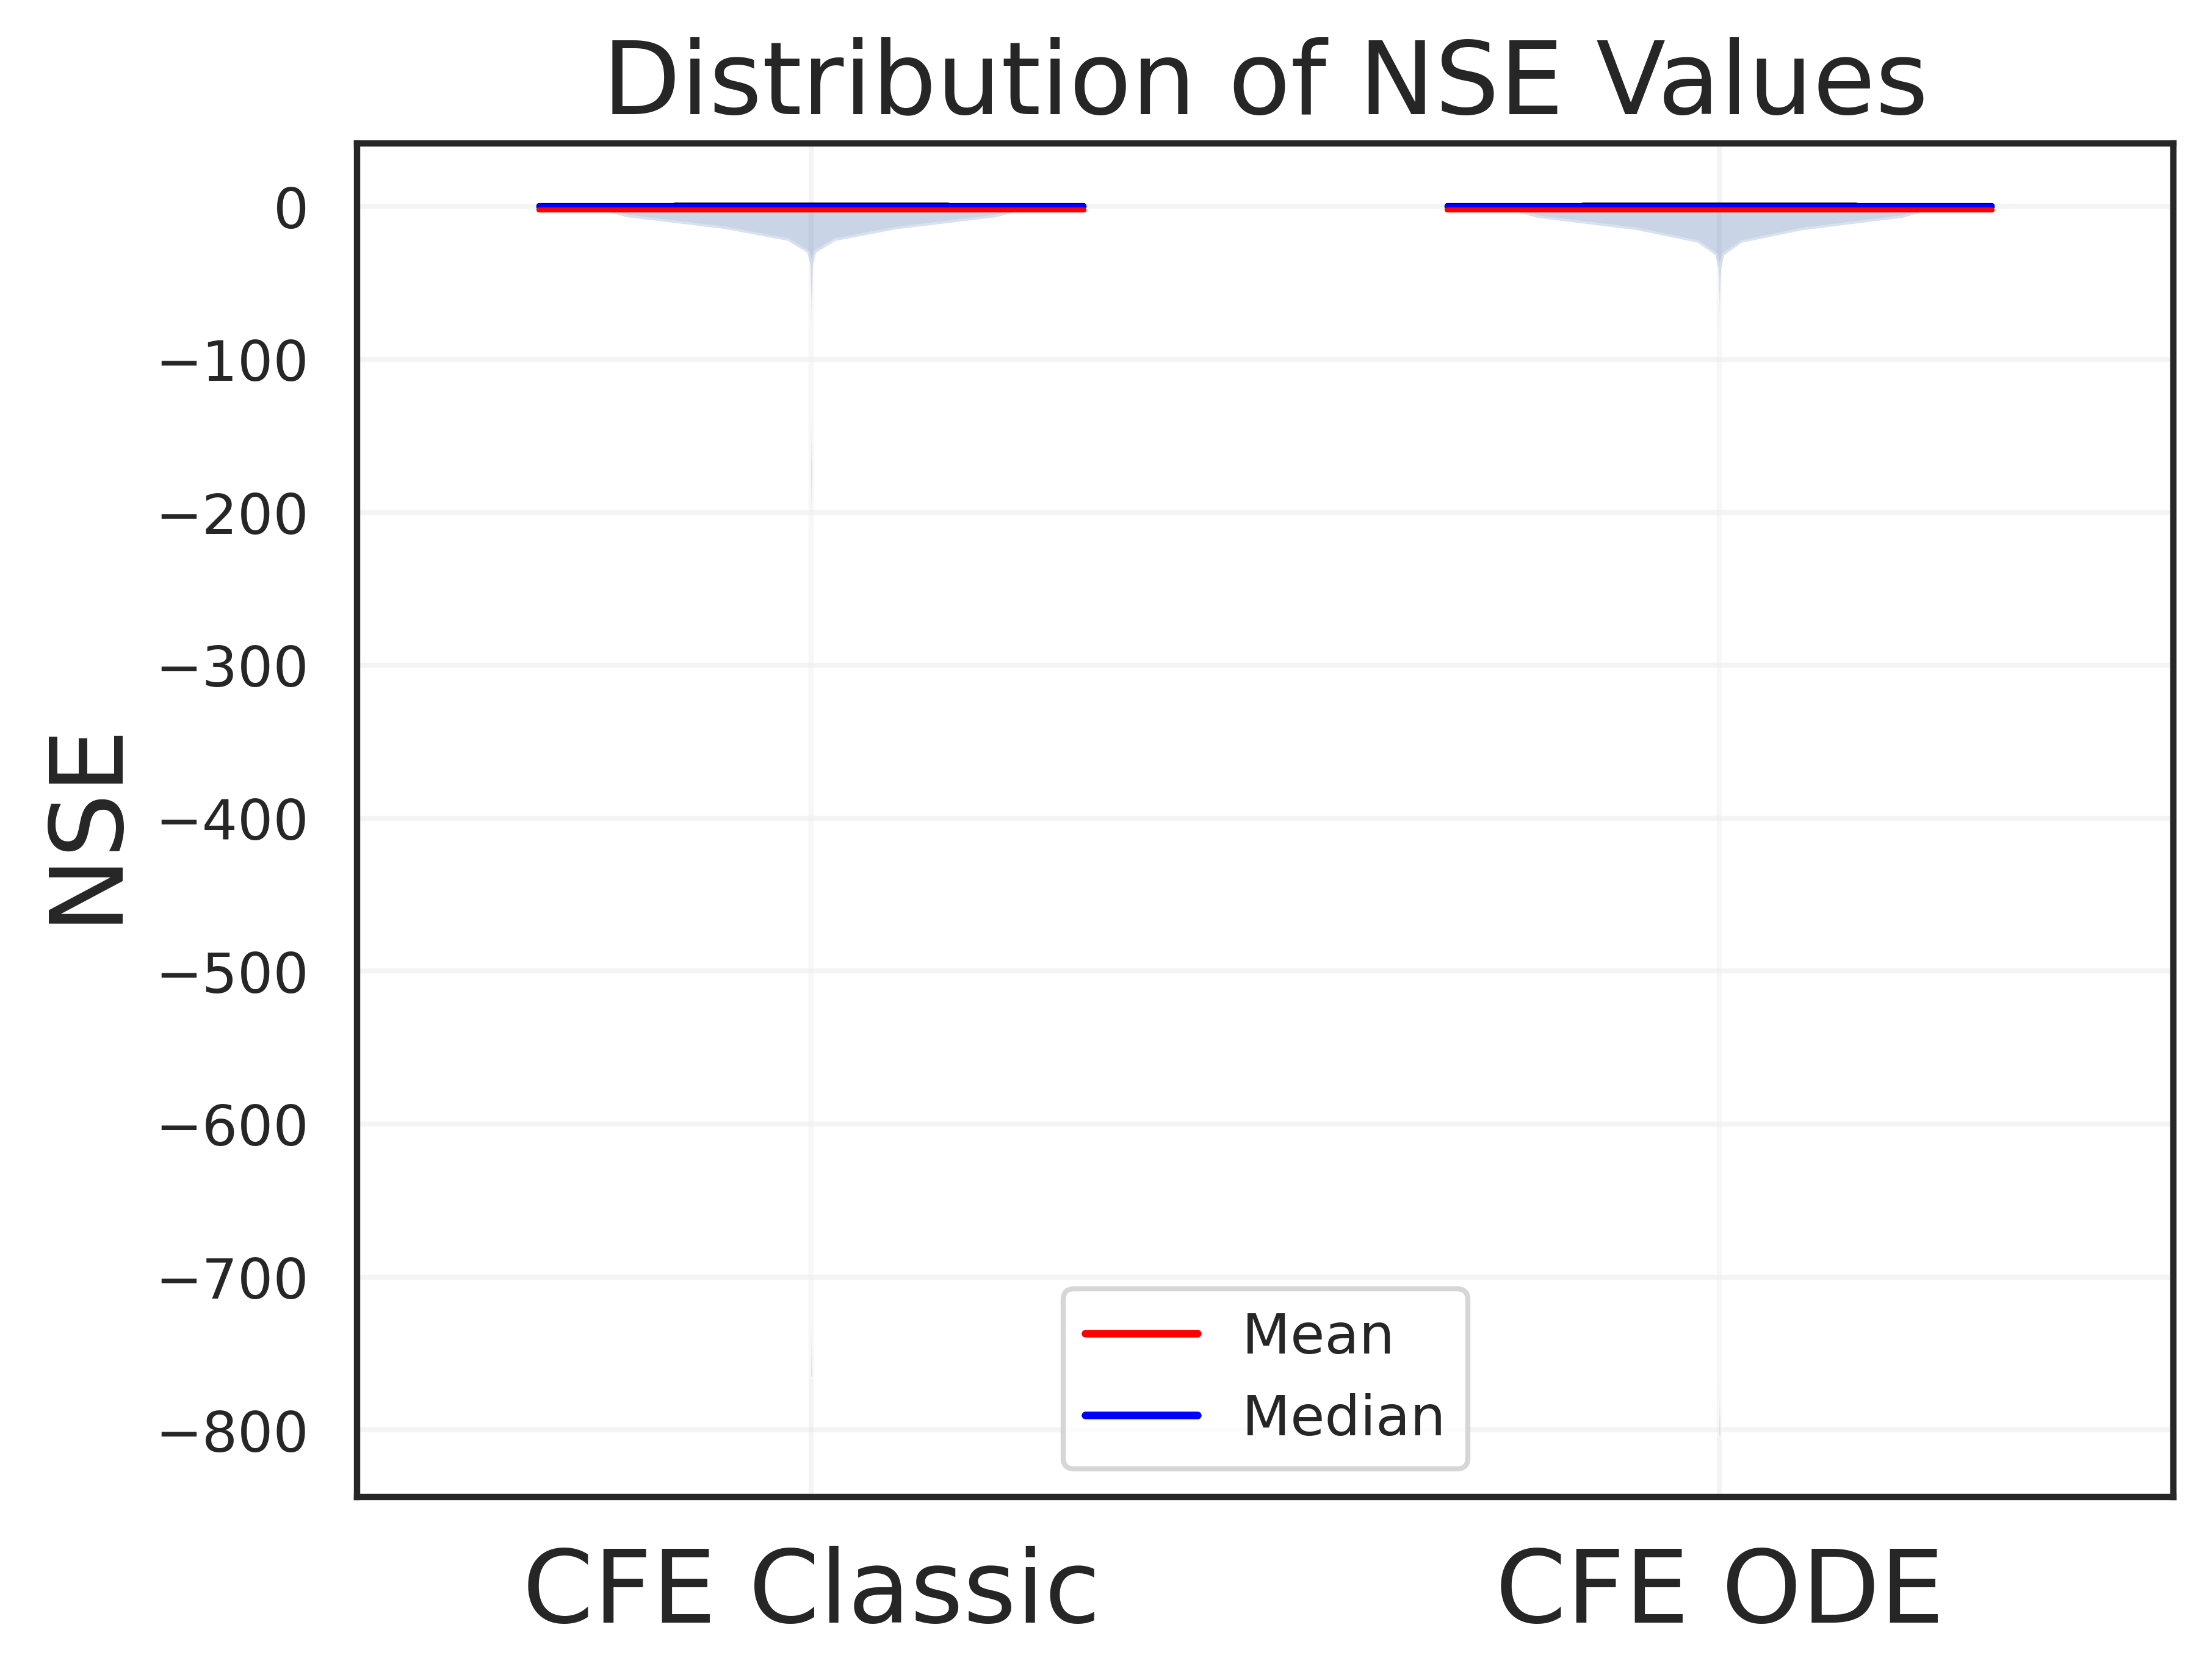

In [28]:
sns.set_style('white')
fig, ax = plt.subplots()
violinplotdata = [nse_classic, nse_ode]
parts = ax.violinplot(violinplotdata, showmeans=False, showmedians=False, showextrema=False)
bp1 = ax.boxplot(nse_classic, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
bp2 = ax.boxplot(nse_ode, positions=[2], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax.set_xticks([1, 2])
ax.set_xticklabels(['CFE Classic', 'CFE ODE'], size=20)
ax.set_ylim(-20, 1)
ax.set_ylabel('NSE', size=20)
ax.set_title('Distribution of NSE Values', size=20)
bp1['means'][0].set(color='red', linestyle='-')
bp1['medians'][0].set(color='blue')
bp2['means'][0].set(color='red', linestyle='-')
bp2['medians'][0].set(color='blue')
mean_legend = mlines.Line2D([], [], color='red', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', linestyle='-', label='Median')
ax.legend(handles=[mean_legend, median_legend], loc='lower center')
plt.grid(True, linestyle='-', alpha=0.2)
plt.subplots_adjust(wspace=0.1)
plt.savefig('Combined_Violin_Box_NSE.png')
plt.show()

## Distribution Plot - NSE

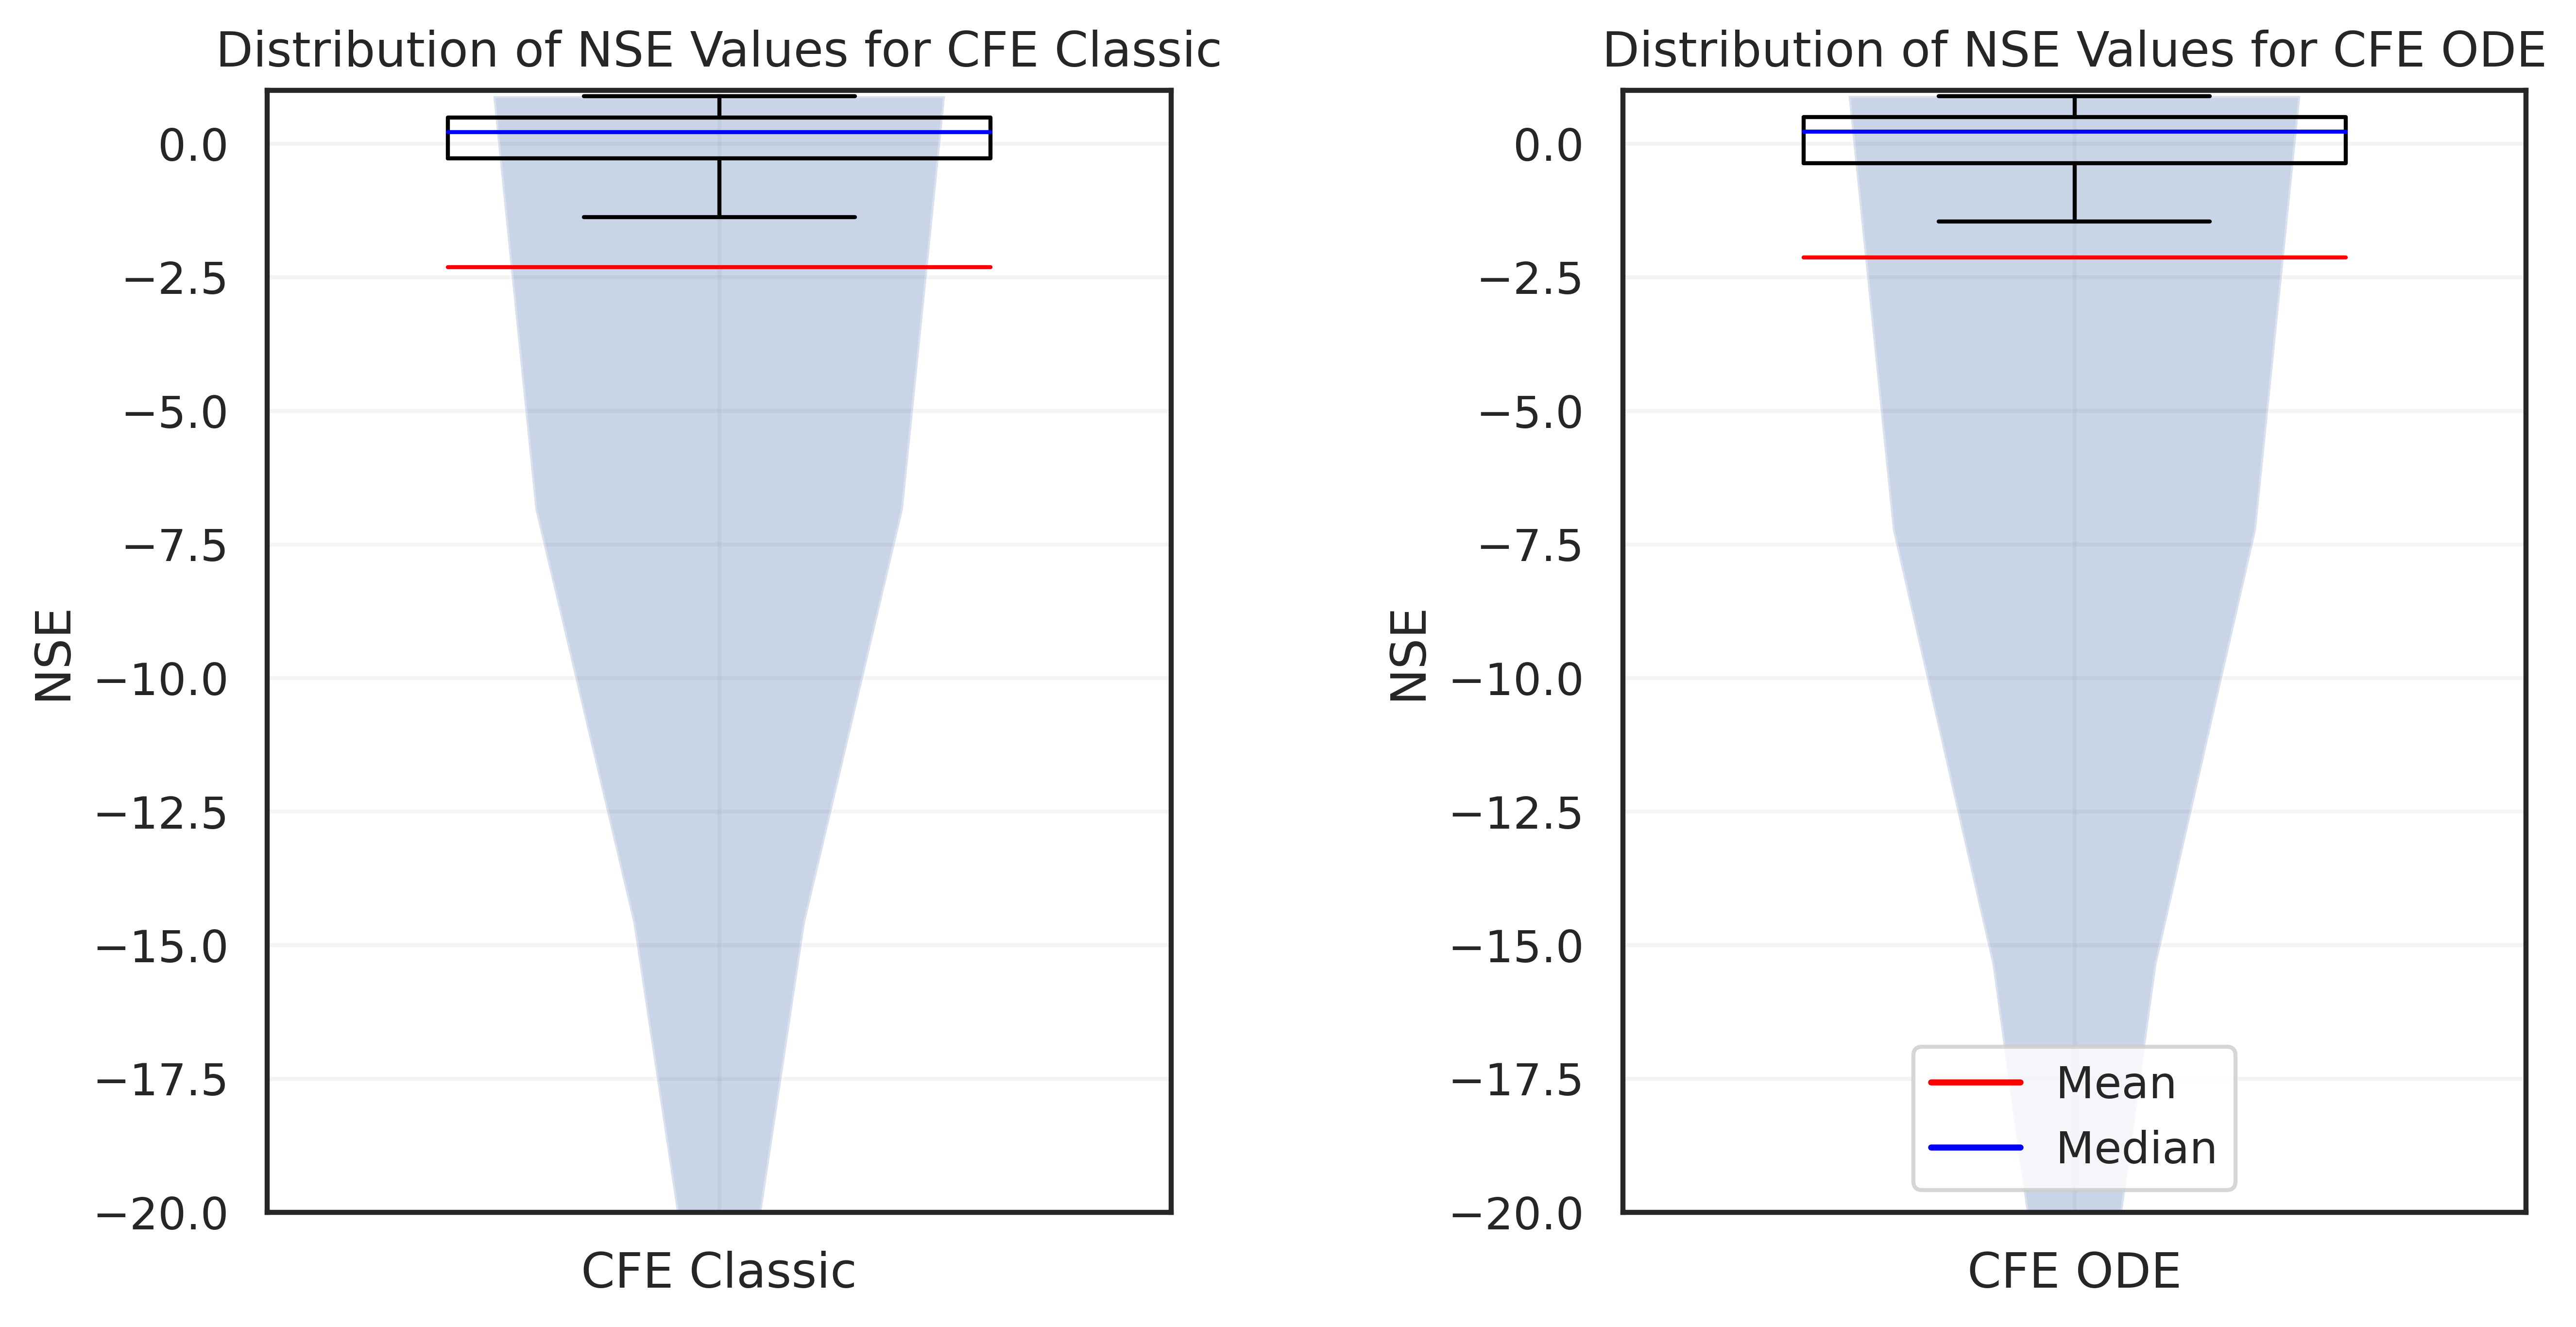

In [27]:
sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
parts1 = ax1.violinplot(nse_classic, showmeans=False, showmedians=False, showextrema=False)
bp1 = ax1.boxplot(nse_classic, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax1.set_xticks([1])
ax1.set_xticklabels(['CFE Classic'], size=12)
ax1.set_ylim(-20, 1)
ax1.set_ylabel('NSE', size=12)
ax1.set_title('Distribution of NSE Values for CFE Classic', size=12)
bp1['means'][0].set(color='red', linestyle='-')
bp1['medians'][0].set(color='blue')
parts2 = ax2.violinplot(nse_ode, showmeans=False, showmedians=False, showextrema=False)
bp2 = ax2.boxplot(nse_ode, positions=[1], widths=0.6, showmeans=True, meanline=True, showfliers=False)
ax2.set_xticks([1])
ax2.set_xticklabels(['CFE ODE'], size=12)
ax2.set_ylim(-20, 1)
ax2.set_ylabel('NSE', size=12)
ax2.set_title('Distribution of NSE Values for CFE ODE', size=12)
bp2['means'][0].set(color='red', linestyle='-')
bp2['medians'][0].set(color='blue')
mean_legend = mlines.Line2D([], [], color='red', linestyle='-', markersize=5, label='Mean')
median_legend = mlines.Line2D([], [], color='blue', linestyle='-', label='Median')
ax2.legend(handles=[mean_legend, median_legend], loc='lower center')
ax1.grid(True, linestyle='-', alpha=0.2)
ax2.grid(True, linestyle='-', alpha=0.2)
plt.subplots_adjust(wspace=0.5)
plt.savefig('Combined_Violin_Box_NSE.png')
plt.show()

## Spatial Plot with better performing model - NSE

Text(0.5, 1.0, 'Better Performing Model Based on NSE')

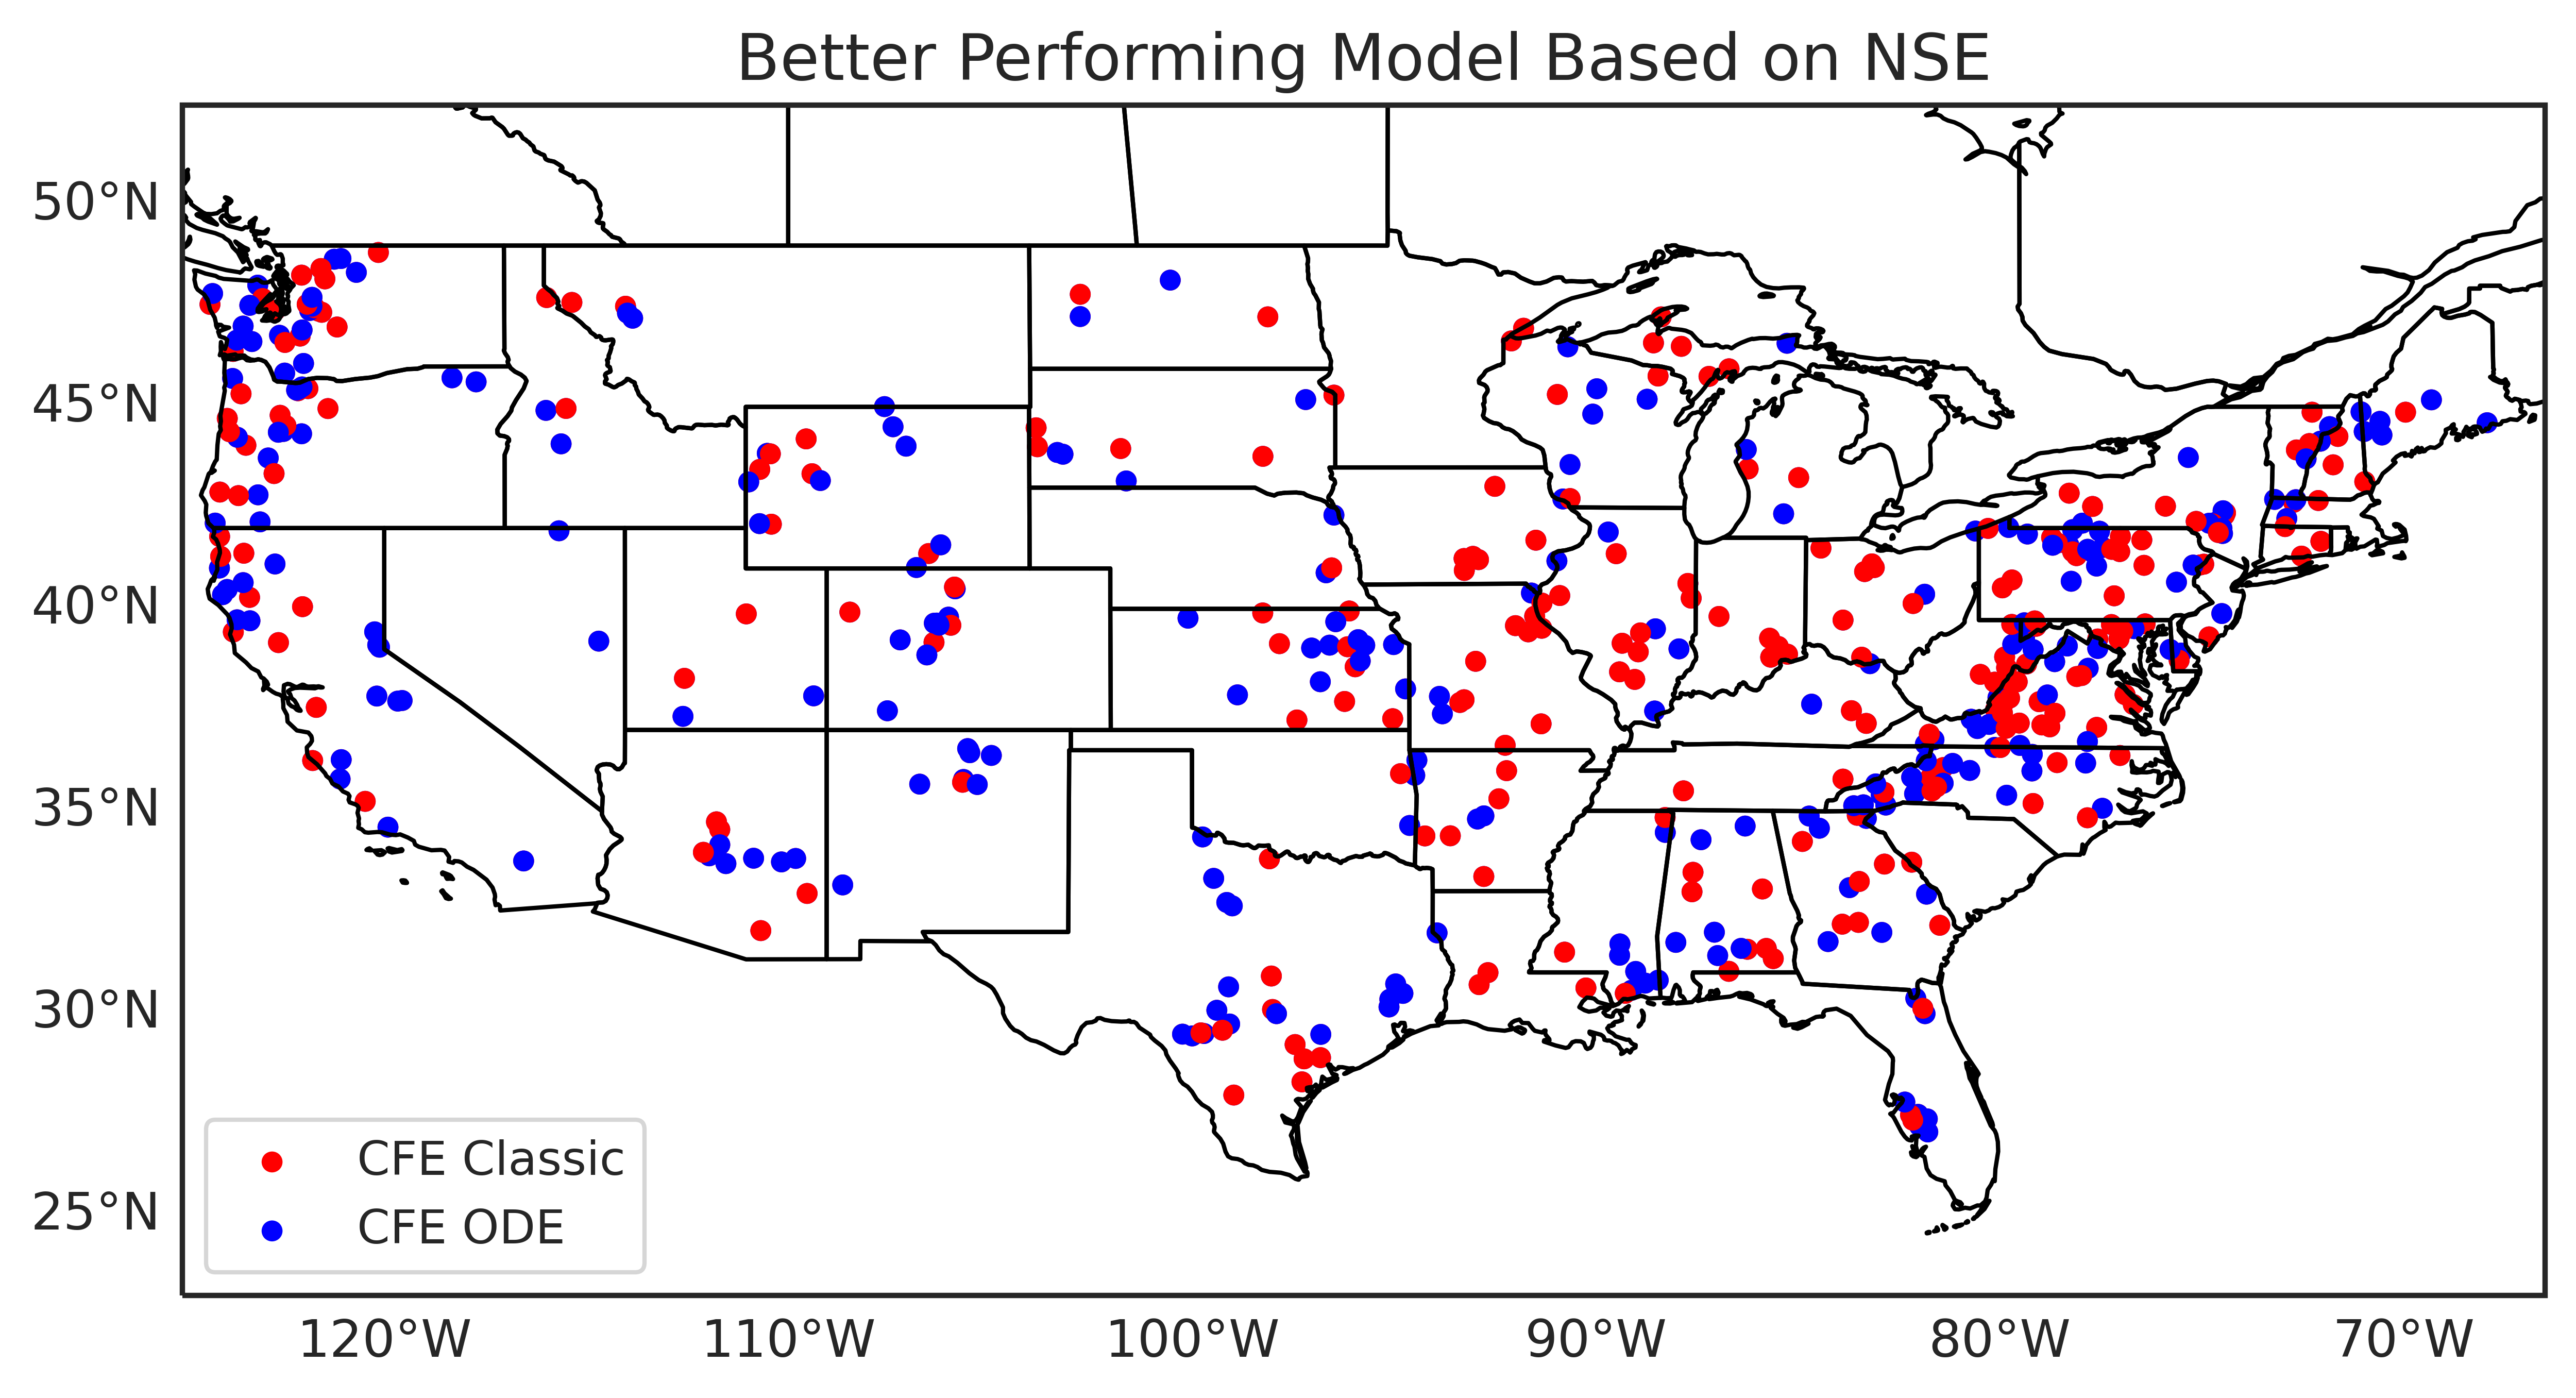

In [22]:
lat_min,lat_max = 23, 49
lon_min,lon_max = -66.5, -125
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 5), dpi=600)
ax = plt.axes(projection=proj)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.STATES)
color_array_classic = np.where(nse_classic > nse_ode, 'red', 'blue')
color_array_ode = np.where(nse_classic > nse_ode, 'blue', 'red')
sc1 = ax.scatter(lon, lat, s=15, c=color_array_classic, transform=proj, label='CFE Classic')
sc2 = ax.scatter(lon, lat, s=15, c=color_array_ode, transform=proj, label='CFE ODE')
scatter_legend_handler = HandlerPathCollection()
legend_labels = ['CFE Classic', 'CFE ODE']
plt.legend([sc1, sc2], legend_labels, handler_map={type(sc1): scatter_legend_handler}, loc='lower left')
gl = ax.gridlines(draw_labels=True, color='None')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
plt.title('Better Performing Model Based on NSE', size=15)

## Spatial Plot of combined model performance

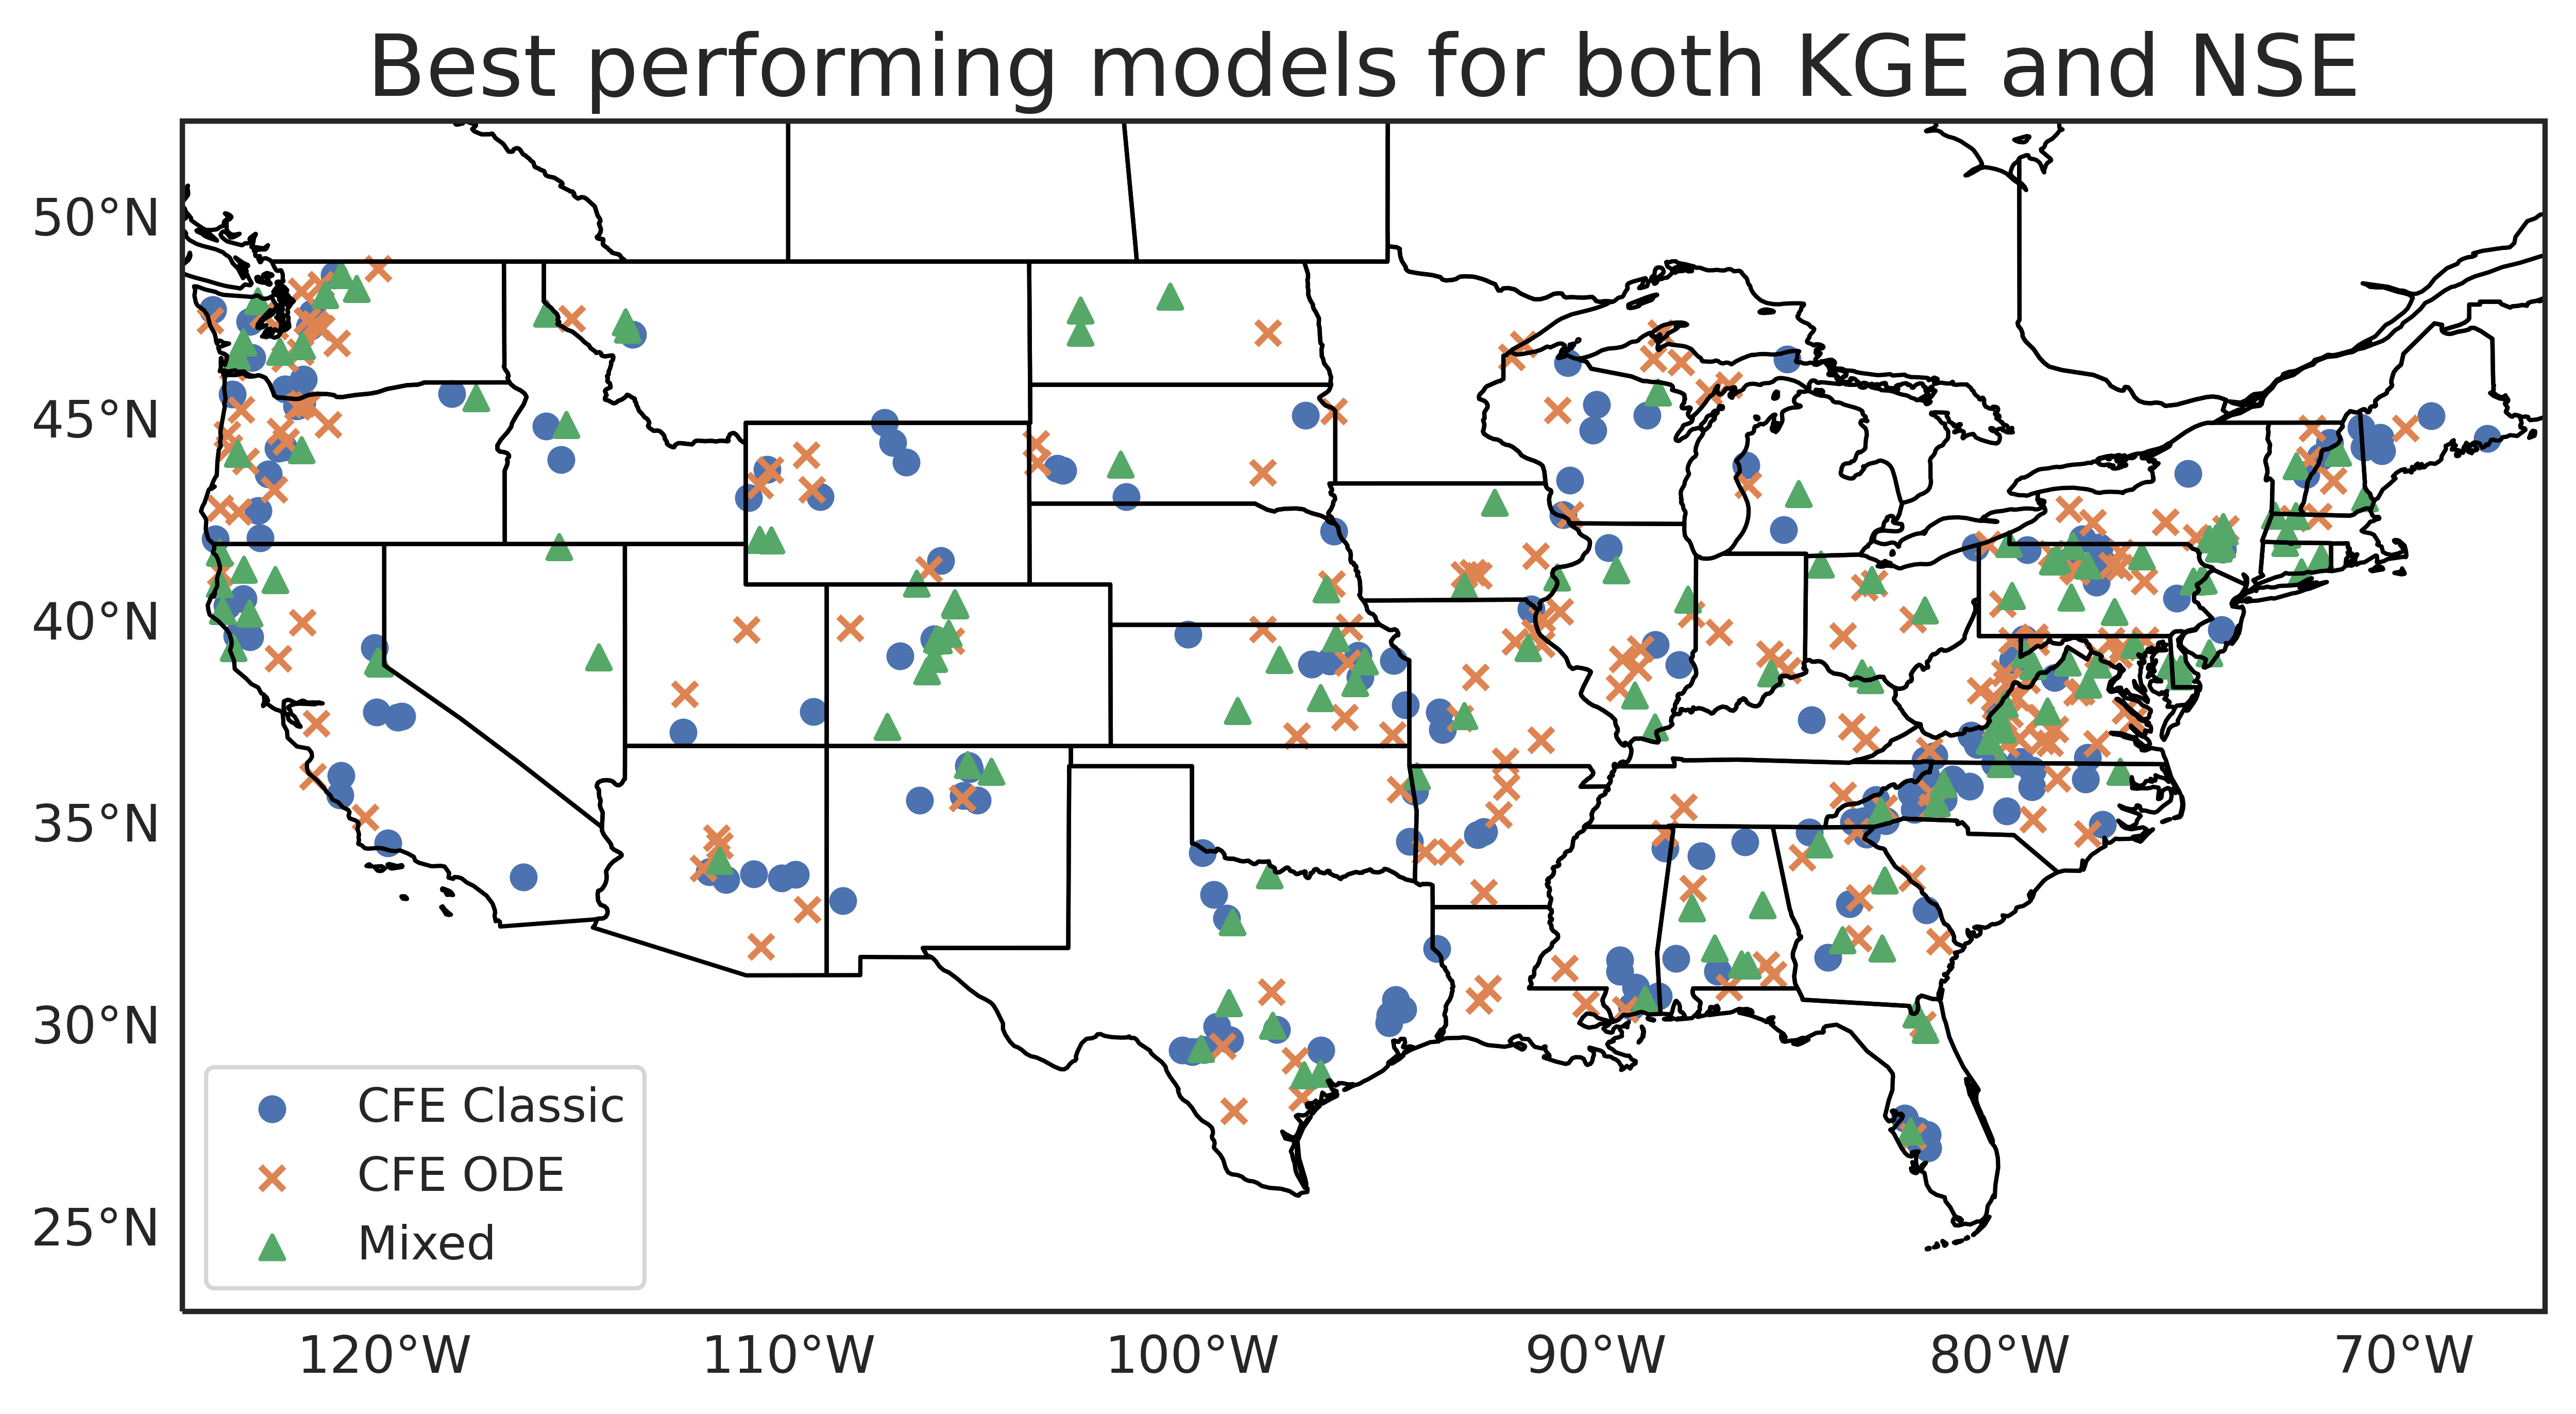

<Figure size 3840x2880 with 0 Axes>

In [23]:
lat_min, lat_max = 23, 49
lon_min, lon_max = -66.5, -125
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 5), dpi=600)
ax = plt.axes(projection=proj)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.STATES)
condition1 = np.logical_and(kge_classic > kge_ode, nse_classic > nse_ode)
condition2 = np.logical_and(kge_ode > kge_classic, nse_ode > nse_classic)
ax.scatter(lon[condition1], lat[condition1], s=30, transform=proj, label='CFE Classic')
ax.scatter(lon[condition2], lat[condition2], s=30, marker='x', transform=proj, label='CFE ODE')
ax.scatter(lon[~np.logical_or(condition1, condition2)], lat[~np.logical_or(condition1, condition2)], s=30, marker='^', transform=proj, label='Mixed')
ax.set_title('Best performing models for both KGE and NSE', size=20)
plt.grid(True, linestyle='-', alpha=0.2)
gl = ax.gridlines(draw_labels=True, color='None')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
plt.legend(loc='lower left')
plt.show()
plt.savefig('Overall CONUS')